# Super ratio of $(e,e'\pi^+)/(e,e'\pi^+)$ with a fast tagged neutron

$$\left(\frac{\sigma(e,e'\pi^+)}{\sigma(e,e'\pi^+)}\right)_{p_n>275 GeV/c}/\left(\frac{\sigma(e,e'\pi^+)}{\sigma(e,e'\pi^+)}\right)$$

last edit Dec-16, 2021

## definitions

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/mySoftware/Python/'); 
from my_tools               import *; 
from plot_tools             import *;
from my_data_analysis_tools import *;
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
r2d = 180./np.pi

In [2]:
main_data_path     = '/Users/erezcohen/Desktop/data/BAND/'
e_e_pi_data_path   = main_data_path + 'SIDIS_skimming/'
e_e_pi_n_data_path = main_data_path + 'merged_SIDIS_and_BAND_skimming/'

In [3]:
pi_charge_names  = ['piplus'   ,'piminus'  ]
pi_labels        = ['\pi^{+}'  ,'\pi^{-}'  ]
pi_colors        = ['royalblue','salmon'   ]

## load data

## Selection cuts not previously imposed

In [4]:
# for pi_charge_name in pi_charge_names:
#     # large momentum neutrons ( Pn > 275 MeV/c)
#     e_e_pi_n[pi_charge_name] = e_e_pi_n[pi_charge_name][e_e_pi_n[pi_charge_name]['n_P']>0.275]
    
#     print('retained',len(e_e_pi_n[pi_charge_name]),'(e,e',pi_charge_name,'n), events')        

## Auxiliary functions

In [8]:
fontsize = 18

In [5]:
def plot_step_hist( df, var='xB',
                   bins=np.linspace(0,1,10), label="$(e,e')$"):
    h,edges = np.histogram( df[var], bins=x_bins)
    h_err = np.sqrt(h)
    x     = (edges[1:] + edges[:-1])/2
    x_err = (edges[1:] - edges[:-1])/2
    plt.step ( x, h, color=pi_color, where='mid', label=label ) 
    plt.errorbar ( x, h, h_err, color=pi_color, marker='o', linestyle='None',label=None, capsize=2 )
    return x,h,x_err

In [6]:
def get_err_up_dw(x, xerr,lim_dw = 0,lim_up = 10):
    errup=xerr
    errdw=xerr
    
    for i in range(len(x)):
        if (x[i]+errup[i]) > lim_up:
            errup[i] = lim_up-x[i]
        
        if lim_dw > (x[i]-errdw[i]):
            errdw[i] = x[i]-lim_dw
        

    return errup,errdw

In [244]:
def compute_ratio_pips_to_pims(df_dict, var='xB', bins=np.linspace(0,1,10), z_min=0, z_max=1, 
                               theta_min=0, theta_max=np.pi, 
                               Mx_min=0, Mx_max=100,  
                               is_eepi=True):
    # z_min,z_max are z limits on the pion outgoing momentum
    df_pips = df_dict['piplus']
    df_pims = df_dict['piminus']
    # cut on z
    df_pips = df_pips[ (z_min<df_pips.Zpi) & (df_pips.Zpi<z_max) 
                      & (theta_min<df_pips.pi_Theta*r2d) & (df_pips.pi_Theta*r2d<theta_max) ]
    
    df_pims = df_pims[ (z_min     < df_pims.Zpi)          & (df_pims.Zpi          < z_max) 
                      & (theta_min< df_pims.pi_Theta*r2d) & (df_pims.pi_Theta*r2d < theta_max)]

    # and cut on Mx if its (e,e'pi)
    if is_eepi:#{
        df_pips = df_pips[ (Mx_min < df_pips.M_X) & (df_pips.M_X < Mx_max)]    
        df_pims = df_pims[ (Mx_min < df_pims.M_X) & (df_pims.M_X < Mx_max)]
    #}
    
    pips = df_pips[var]
    pims = df_pims[var]
    R_pips_to_pims, R_pips_to_pims_err = [],[]
    for x_min,x_max in zip(bins[:-1],bins[1:]):
        
        pips_in_bin  = pips[ (x_min < pips) & (pips < x_max) ]
        Npips_in_bin = len(pips_in_bin)
        pims_in_bin  = pims[ (x_min < pims) & (pims < x_max) ]
        Npims_in_bin = len(pims_in_bin)    

        R            = Npips_in_bin/np.max([Npims_in_bin,1])
        R_err        = R * np.sqrt( 1./np.max([1,Npips_in_bin]) + 1./np.max([1,Npims_in_bin]) )

        R_pips_to_pims    .append(R)
        R_pips_to_pims_err.append(R_err)
        
    R_pips_to_pims_errup,R_pips_to_pims_errdw = get_err_up_dw(R_pips_to_pims, R_pips_to_pims_err)
    
    return np.array(R_pips_to_pims),np.array(R_pips_to_pims_errup),np.array(R_pips_to_pims_errdw)

In [197]:
def compute_ratio_assymetry(df_dict, var='xB', bins=np.linspace(0,1,10), z_min=0, z_max=1,                                
                            theta_min=0, theta_max=np.pi,                             
                            Mx_min=0, Mx_max=100,
                            is_eepi=True):
    # z_min,z_max are z limits on the pion outgoing momentum
    df_pips = df_dict['piplus']
    df_pims = df_dict['piminus']
    # cut on z
    df_pips = df_pips[ (z_min<df_pips.Zpi) & (df_pips.Zpi<z_max) 
                      & (theta_min<df_pips.pi_Theta*r2d) & (df_pips.pi_Theta*r2d<theta_max) ]
    
    df_pims = df_pims[ (z_min     < df_pims.Zpi)          & (df_pims.Zpi          < z_max) 
                      & (theta_min< df_pims.pi_Theta*r2d) & (df_pims.pi_Theta*r2d < theta_max)]

    # and cut on Mx if its (e,e'pi)
    if is_eepi:#{
        df_pips = df_pips[ (Mx_min < df_pips.M_X) & (df_pips.M_X < Mx_max)]    
        df_pims = df_pims[ (Mx_min < df_pims.M_X) & (df_pims.M_X < Mx_max)]
    #}
    

    pips = df_pips[var]
    pims = df_pims[var]
    Rassymetry, Rassymetry_err = [],[]
    for x_min,x_max in zip(bins[:-1],bins[1:]):
        
        pips_in_bin  = pips[ (x_min < pips) & (pips < x_max) ]
        Npips_in_bin = len(pips_in_bin)
        pims_in_bin  = pims[ (x_min < pims) & (pims < x_max) ]
        Npims_in_bin = len(pims_in_bin)    

        nom          = (Npips_in_bin + Npims_in_bin)
        den          = np.max([Npips_in_bin - Npims_in_bin,1])
        R            = nom/den
        R_err        = np.abs(1/den) * np.sqrt(  Npips_in_bin*np.square(1 - Npips_in_bin/den)
                                               + Npims_in_bin*np.square(1 + Npims_in_bin/den) )

        Rassymetry    .append(R)
        Rassymetry_err.append(R_err)
        
    Rassymetry_errup,Rassymetry_errdw = get_err_up_dw(Rassymetry, Rassymetry_err)
    
    return np.array(Rassymetry),np.array(Rassymetry_errup),np.array(Rassymetry_errdw)

# Accumulated data from 101 runs of 10.2 GeV

## load data

In [9]:
runs_filename = "/Users/erezcohen/Desktop/Software/CLAS12/BAND/SIDIS_at_BAND/macros/runlists/good_runs_10-2.txt"

# Using readlines()
runs_file     = open(runs_filename, 'r')
run_fileLines = runs_file.readlines()
runs = []
for line in run_fileLines:#{
    run = int(line.strip())
    runs.append(run)
runs = np.array(runs)
runs

array([6420, 6421, 6422, 6426, 6428, 6429, 6430, 6431, 6432, 6433, 6437,
       6442, 6443, 6444, 6445, 6449, 6450, 6451, 6452, 6453, 6454, 6455,
       6456, 6457, 6458, 6461, 6462, 6463, 6464, 6465, 6466, 6467, 6468,
       6470, 6472, 6473, 6474, 6475, 6476, 6479, 6481, 6482, 6483, 6484,
       6485, 6486, 6488, 6489, 6491, 6492, 6498, 6499, 6501, 6502, 6510,
       6511, 6512, 6513, 6514, 6516, 6522, 6523, 6524, 6525, 6546, 6547,
       6548, 6549, 6550, 6557, 6558, 6559, 6560, 6562, 6563, 6565, 6566,
       6567, 6568, 6569, 6570, 6571, 6572, 6573, 6576, 6577, 6578, 6581,
       6582, 6585, 6586, 6587, 6589, 6590, 6591, 6592, 6593, 6595, 6596,
       6597, 6598])

In [10]:
fdebug   = 1
e_e_pi   = dict()
e_e_pi_n = dict()
for runnum,runIdx in zip(runs,range(len(runs))):
    for pi_charge_name in pi_charge_names:
        eepi   = pd.read_csv(e_e_pi_data_path 
                                           +'skimmed_SIDIS_inc_00%d_e_%s_selected_eepi_kinematics.csv'%(runnum,pi_charge_name))
        eepin = pd.read_csv(e_e_pi_n_data_path 
                                           +'skimmed_SIDIS_and_BAND_inc_00%d_e_%s_n.csv'%(runnum,pi_charge_name))        

        if fdebug>1: print('loaded',len(eepi),'(e,e',pi_charge_name,                  
                           ') events and ',
                           len(eepin),'(e,e',pi_charge_name,'n), events')    
    
        # large momentum neutrons ( Pn > 275 MeV/c)
        eepin = eepin[eepin['n_P']>0.275]
        if fdebug>2: print('retained',len(eepin),'(e,e',pi_charge_name,'n), events')            
        
        if runIdx==0:             
            e_e_pi[pi_charge_name]   = eepi
            e_e_pi_n[pi_charge_name] = eepin
        else:
            e_e_pi[pi_charge_name]   = pd.concat([e_e_pi[pi_charge_name],  eepi ])
            e_e_pi_n[pi_charge_name] = pd.concat([e_e_pi_n[pi_charge_name],eepin])
    print('loaded file %d/%d files'%(runIdx,len(runs)))

loaded file 0/101 files
loaded file 1/101 files
loaded file 2/101 files
loaded file 3/101 files
loaded file 4/101 files
loaded file 5/101 files
loaded file 6/101 files
loaded file 7/101 files
loaded file 8/101 files
loaded file 9/101 files
loaded file 10/101 files
loaded file 11/101 files
loaded file 12/101 files
loaded file 13/101 files
loaded file 14/101 files
loaded file 15/101 files
loaded file 16/101 files
loaded file 17/101 files
loaded file 18/101 files
loaded file 19/101 files
loaded file 20/101 files
loaded file 21/101 files
loaded file 22/101 files
loaded file 23/101 files
loaded file 24/101 files
loaded file 25/101 files
loaded file 26/101 files
loaded file 27/101 files
loaded file 28/101 files
loaded file 29/101 files
loaded file 30/101 files
loaded file 31/101 files
loaded file 32/101 files
loaded file 33/101 files
loaded file 34/101 files
loaded file 35/101 files
loaded file 36/101 files
loaded file 37/101 files
loaded file 38/101 files
loaded file 39/101 files
loaded fil

## Super - ratio: the number of events in each sample

### super ratio as a function of $x_B$

## Super ratio as a function of Bjorken $x$, or for a moving proton $x'$
defined as
$ x' = Q^2/((W')^2 - m_N^2 + Q^2)$

In [207]:
x_bins= np.linspace(0.2,0.6,10) #np.concatenate([np.linspace(0.2,0.45,6), np.linspace(0.5,0.75,8) ])
x     = (x_bins[1:] + x_bins[:-1])/2
x_bins

array([0.2       , 0.24444444, 0.28888889, 0.33333333, 0.37777778,
       0.42222222, 0.46666667, 0.51111111, 0.55555556, 0.6       ])

In [212]:
var_e_e_pi      = 'xB'
xlabel_e_e_pi   = "Bjorken $x$"

# var_e_e_pi_n    = 'xB'
var_e_e_pi_n    = 'xPrime2'

if var_e_e_pi_n == 'xB':
    
    xlabel_e_e_pi_n = "Bjorken $x$"
    SuperRatio_label= "$(x/x)$"

elif var_e_e_pi_n == 'xPrime2':
        
    # xlabel_e_e_pi_n = "$x' = Q^2/2\cdot((m_d - E_s)\omega + p_n \cdot q)$"
    xlabel_e_e_pi_n = "$x' = Q^2/(W'^2 - m_N^2 + Q^2)$"
    SuperRatio_label= "$(x'/x)$"
    
    
theta_min, theta_max = 15, 20
Mx_min, Mx_max       = 2.5, 5

In [213]:
R_e_e_pi_pips_to_pims, R_e_e_pi_pips_to_pims_errup, R_e_e_pi_pips_to_pims_errdw       = compute_ratio_pips_to_pims(df_dict=e_e_pi  , var=var_e_e_pi,  bins=x_bins, 
                                                                                                                   theta_min=theta_min, theta_max=theta_max,                                                                                                                 
                                                                                                                   Mx_min=Mx_min, Mx_max=Mx_max, is_eepi=True)
R_e_e_pi_n_pips_to_pims, R_e_e_pi_n_pips_to_pims_errup, R_e_e_pi_n_pips_to_pims_errdw = compute_ratio_pips_to_pims(df_dict=e_e_pi_n, var=var_e_e_pi_n, bins=x_bins,
                                                                                                                   theta_min=theta_min, theta_max=theta_max,                                                                                                                 
                                                                                                                   Mx_min=Mx_min, Mx_max=Mx_max, is_eepi=False)

SuperR     = R_e_e_pi_n_pips_to_pims / R_e_e_pi_pips_to_pims
SuperR_errup = SuperR * np.sqrt( np.square(R_e_e_pi_n_pips_to_pims_errup/R_e_e_pi_n_pips_to_pims)+                                                                                          
                                np.square(R_e_e_pi_pips_to_pims_errup  /R_e_e_pi_pips_to_pims) ) 
SuperR_errdw = SuperR * np.sqrt( np.square(R_e_e_pi_n_pips_to_pims_errdw/R_e_e_pi_n_pips_to_pims)+                                                                                          
                                np.square(R_e_e_pi_pips_to_pims_errdw  /R_e_e_pi_pips_to_pims) ) 

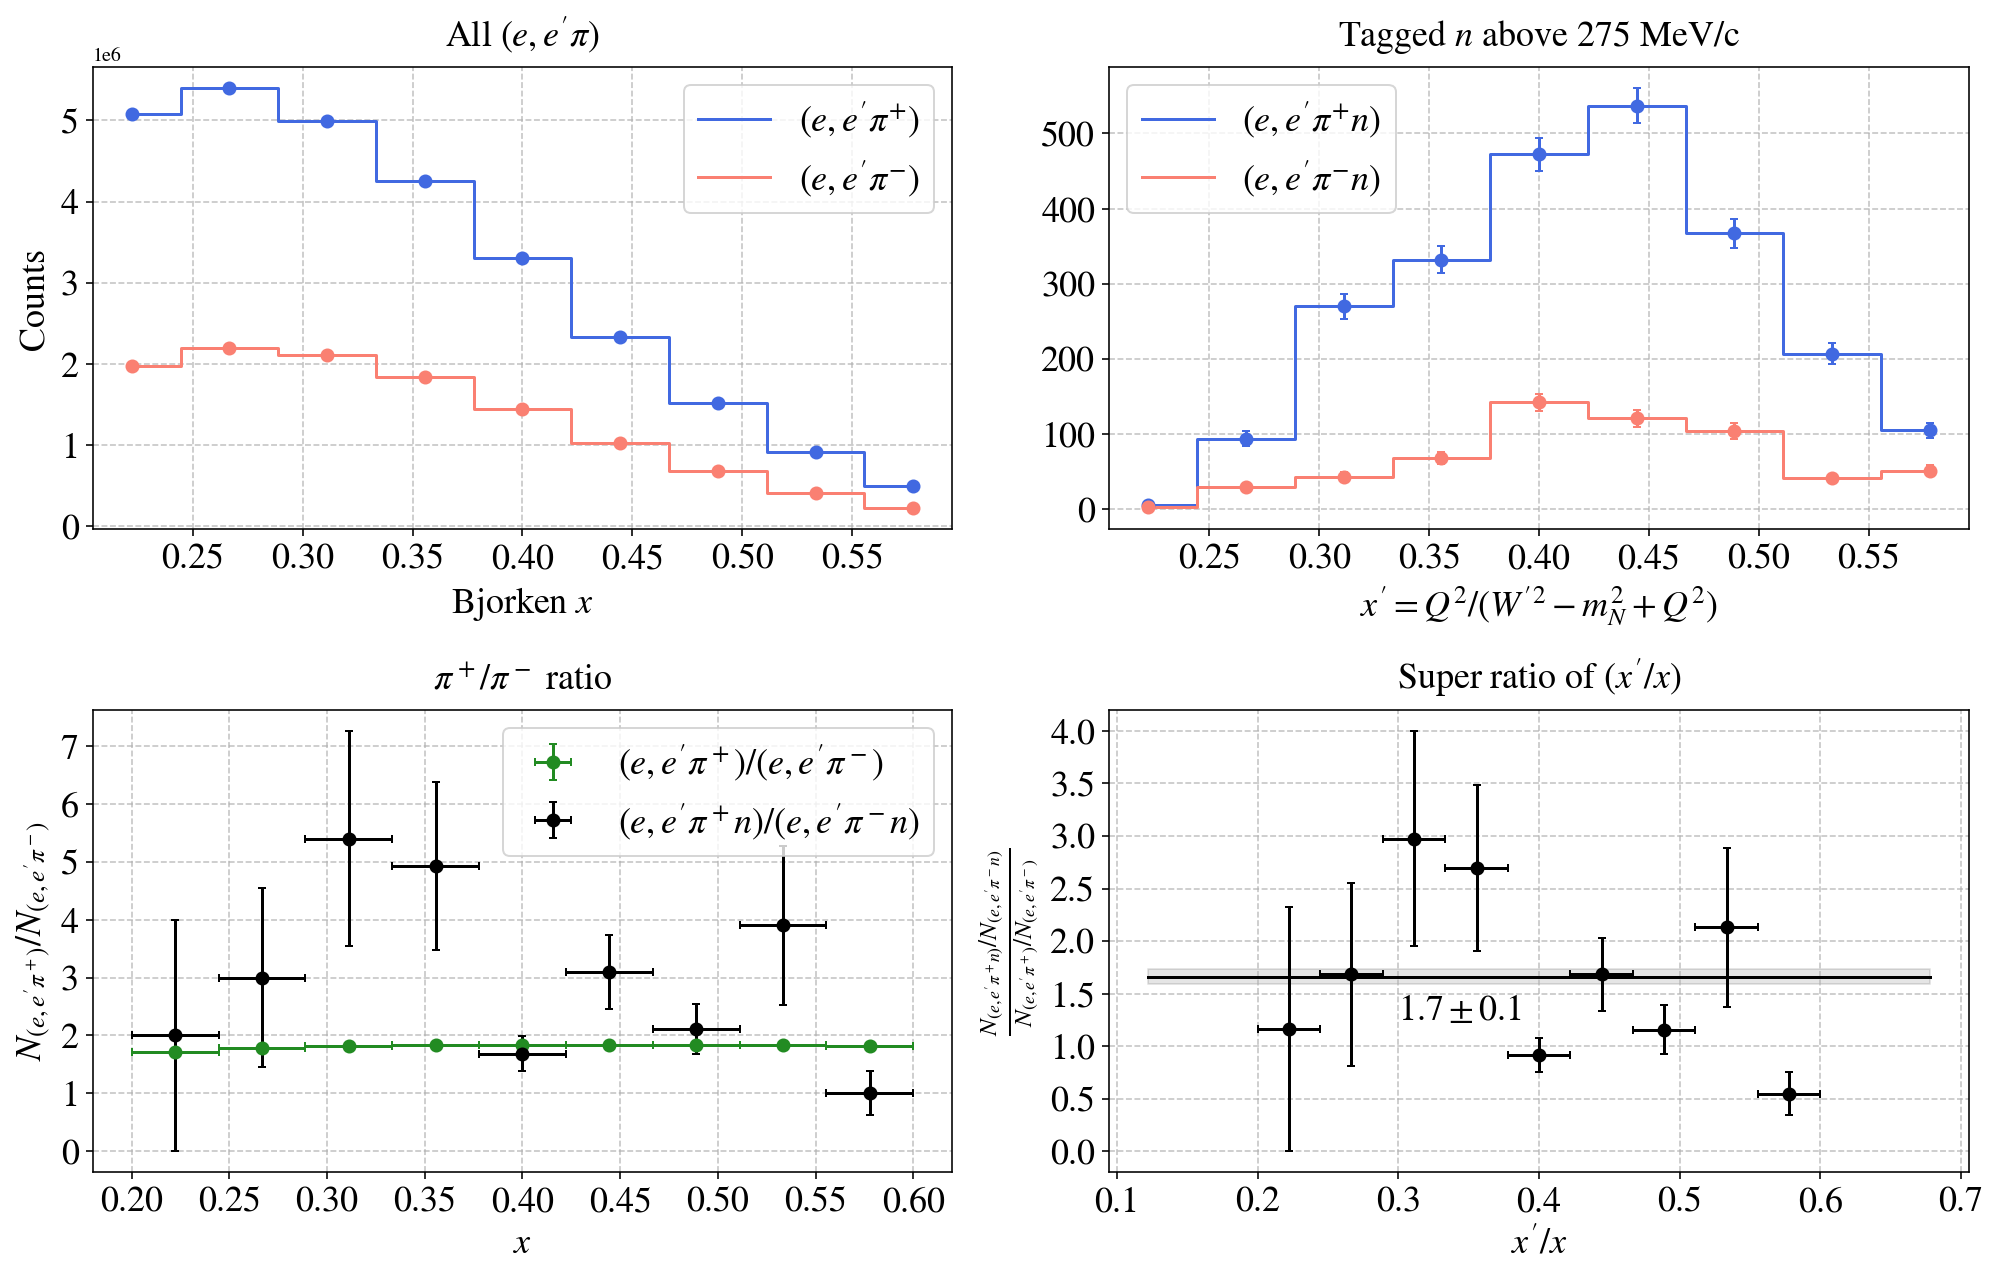

In [241]:
h = dict()

fig = plt.figure(figsize=(14,9))
ax  = fig.add_subplot(2,2,1)
for pi_charge_name,pi_color,pi_label in zip(pi_charge_names,pi_colors,pi_labels):
    x,h[pi_charge_name],x_err= plot_step_hist(df=e_e_pi[pi_charge_name], var=var_e_e_pi, bins=x_bins , label="$(e,e'"+pi_label+")$" )
set_axes(ax,xlabel_e_e_pi,'Counts',title="All $(e,e'\pi)$",do_add_grid=True, do_add_legend=True, fontsize=fontsize)


ax  = fig.add_subplot(2,2,2)
for pi_charge_name,pi_color,pi_label in zip(pi_charge_names,pi_colors,pi_labels):
    x,h[pi_charge_name + 'n'],x_err = plot_step_hist(df=e_e_pi_n[pi_charge_name], var=var_e_e_pi_n, bins=x_bins , label="$(e,e'"+pi_label+"n)$" )
set_axes(ax,xlabel_e_e_pi_n,'',title='Tagged $n$ above 275 MeV/c',do_add_grid=True, do_add_legend=True, fontsize=fontsize)

ax  = fig.add_subplot(2,2,3)
ax.errorbar( x=x, xerr=x_err, y=R_e_e_pi_pips_to_pims, 
            yerr=[R_e_e_pi_pips_to_pims_errdw,R_e_e_pi_pips_to_pims_errup] ,
            marker='o', linestyle='None',
            capsize=2,
            color='forestgreen',label="$(e,e'\pi^+)/(e,e'\pi^-)$")
ax.errorbar( x=x, xerr=x_err, y=R_e_e_pi_n_pips_to_pims, 
            yerr=[R_e_e_pi_n_pips_to_pims_errdw,R_e_e_pi_n_pips_to_pims_errup] , 
            marker='o', linestyle='None',
            capsize=2 ,
            color='black',label="$(e,e'\pi^+n)/(e,e'\pi^-n)$")

set_axes(ax,'$x$',"$N_{(e,e'\pi^+)}/N_{(e,e'\pi^-)}$",
                     title='$\pi^+/\pi^-$ ratio',
         do_add_grid=True, do_add_legend=True, fontsize=fontsize)


ax  = fig.add_subplot(2,2,4)
l=ax.errorbar( x=x, xerr=x_err, y=SuperR, 
            yerr=[SuperR_errdw,SuperR_errup],
            marker='o', linestyle='None',             
            capsize=2,
            color='black')
# fit to constant
p,cov = np.polyfit(x=x,y=SuperR,deg=0,cov=True)
Const_SuperR,dConst_SuperR = p[0],cov[0,0]        
x_fit = np.linspace(np.min(x)-0.1,np.max(x)+0.1,100)
y_dw = (Const_SuperR - dConst_SuperR)*np.ones(len(x_fit))
y_up = (Const_SuperR + dConst_SuperR)*np.ones(len(x_fit))
ax.plot( x_fit, Const_SuperR*np.ones(len(x_fit)) , color=l[0].get_color())
ax.fill_between( x_fit, y_dw, y_up, color=l[0].get_color(), alpha=0.1)
plt.text( 0.3, 1.25 ,'$%.1f\pm%.1f$'%(Const_SuperR,dConst_SuperR),fontsize=18)


set_axes(ax,"$x'/x$",
         "$\\frac{N_{(e,e'\pi^+n)}/N_{(e,e'\pi^-n)}}{N_{(e,e'\pi^+)}/N_{(e,e'\pi^-)}}$",
         title="Super ratio of " + SuperRatio_label,
         do_add_grid=True, fontsize=fontsize)

plt.tight_layout()

#### Reproduce the same plot for an intermediate range in $z$
$0.3<z<0.6$

In [243]:
z_min = 0.3
z_max = 0.6

In [245]:
R_e_e_pi_pips_to_pims, R_e_e_pi_pips_to_pims_errup, R_e_e_pi_pips_to_pims_errdw       = compute_ratio_pips_to_pims(df_dict=e_e_pi  , var=var_e_e_pi,  bins=x_bins, 
                                                                                                                   z_min=z_min, z_max=z_max,
                                                                                                                   theta_min=theta_min, theta_max=theta_max,                                                                                                                 
                                                                                                                   Mx_min=Mx_min, Mx_max=Mx_max, is_eepi=True)
R_e_e_pi_n_pips_to_pims, R_e_e_pi_n_pips_to_pims_errup, R_e_e_pi_n_pips_to_pims_errdw = compute_ratio_pips_to_pims(df_dict=e_e_pi_n, var=var_e_e_pi_n, bins=x_bins,
                                                                                                                   z_min=z_min, z_max=z_max,
                                                                                                                   theta_min=theta_min, theta_max=theta_max,                                                                                                                 
                                                                                                                   Mx_min=Mx_min, Mx_max=Mx_max, is_eepi=False)

SuperR     = R_e_e_pi_n_pips_to_pims / R_e_e_pi_pips_to_pims
SuperR_errup = SuperR * np.sqrt( np.square(R_e_e_pi_n_pips_to_pims_errup/R_e_e_pi_n_pips_to_pims)+                                                                                          
                                np.square(R_e_e_pi_pips_to_pims_errup  /R_e_e_pi_pips_to_pims) ) 
SuperR_errdw = SuperR * np.sqrt( np.square(R_e_e_pi_n_pips_to_pims_errdw/R_e_e_pi_n_pips_to_pims)+                                                                                          
                                np.square(R_e_e_pi_pips_to_pims_errdw  /R_e_e_pi_pips_to_pims) ) 

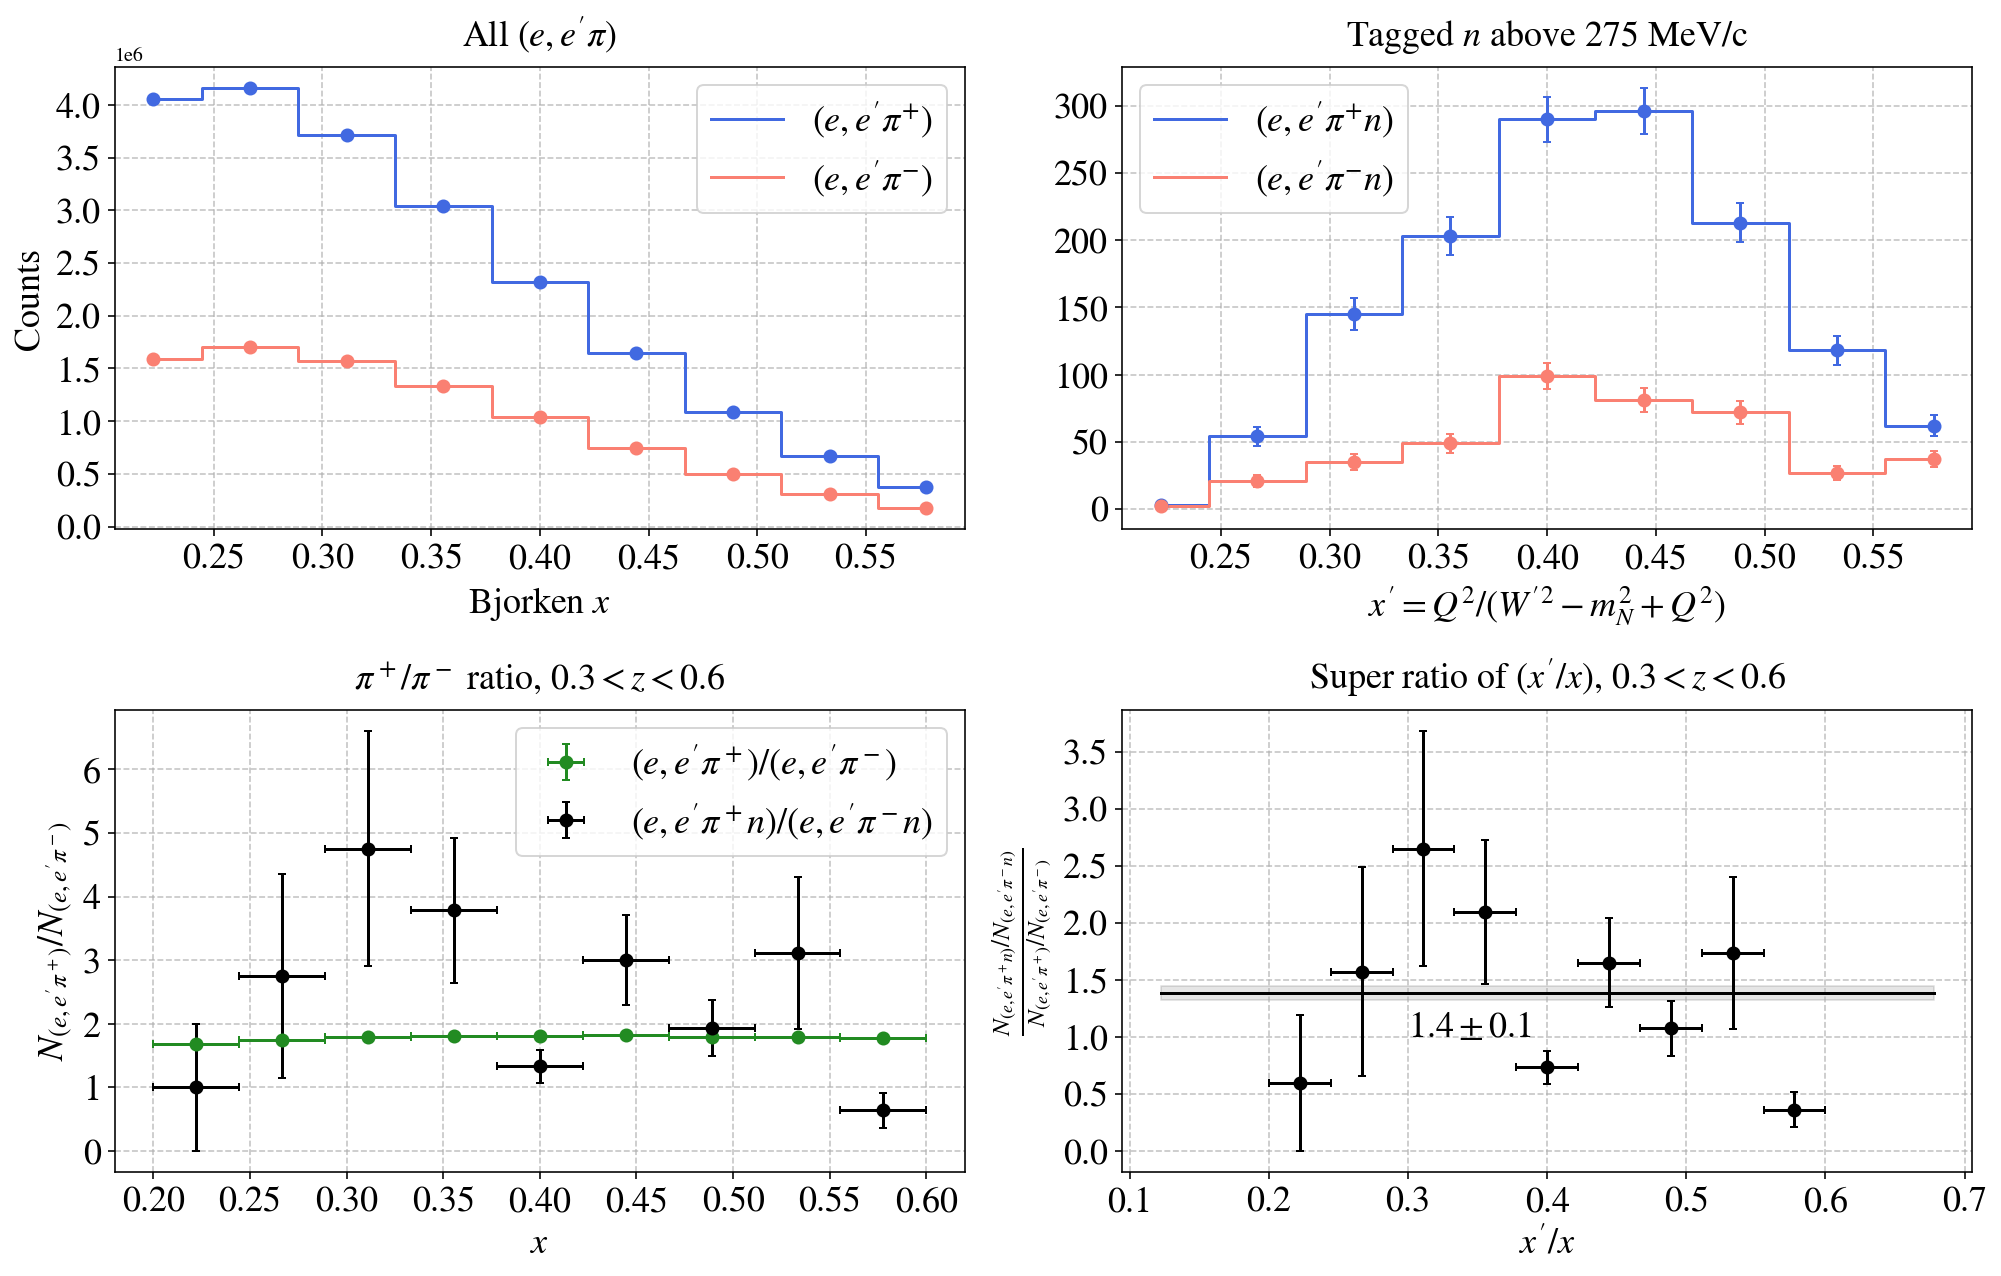

In [249]:
h = dict()

fig = plt.figure(figsize=(14,9))
ax  = fig.add_subplot(2,2,1)
for pi_charge_name,pi_color,pi_label in zip(pi_charge_names,pi_colors,pi_labels):
    df = e_e_pi[pi_charge_name]
    df = df[(z_min < df.Zpi)&(df.Zpi<z_max)]
    x,h[pi_charge_name],x_err= plot_step_hist(df=df, 
                                              var=var_e_e_pi, bins=x_bins , label="$(e,e'"+pi_label+")$" )
set_axes(ax,xlabel_e_e_pi,'Counts',title="All $(e,e'\pi)$",do_add_grid=True, do_add_legend=True, fontsize=fontsize)


ax  = fig.add_subplot(2,2,2)
for pi_charge_name,pi_color,pi_label in zip(pi_charge_names,pi_colors,pi_labels):
    df = e_e_pi_n[pi_charge_name]
    df = df[(z_min < df.Zpi)&(df.Zpi<z_max)]
    x,h[pi_charge_name + 'n'],x_err = plot_step_hist(df=df,
                                                     var=var_e_e_pi_n, bins=x_bins , label="$(e,e'"+pi_label+"n)$" )
set_axes(ax,xlabel_e_e_pi_n,'',title='Tagged $n$ above 275 MeV/c',do_add_grid=True, do_add_legend=True, fontsize=fontsize)

ax  = fig.add_subplot(2,2,3)
ax.errorbar( x=x, xerr=x_err, y=R_e_e_pi_pips_to_pims, 
            yerr=[R_e_e_pi_pips_to_pims_errdw,R_e_e_pi_pips_to_pims_errup] ,
            marker='o', linestyle='None',
            capsize=2,
            color='forestgreen',label="$(e,e'\pi^+)/(e,e'\pi^-)$")
ax.errorbar( x=x, xerr=x_err, y=R_e_e_pi_n_pips_to_pims, 
            yerr=[R_e_e_pi_n_pips_to_pims_errdw,R_e_e_pi_n_pips_to_pims_errup] , 
            marker='o', linestyle='None',
            capsize=2 ,
            color='black',label="$(e,e'\pi^+n)/(e,e'\pi^-n)$")

set_axes(ax,'$x$',"$N_{(e,e'\pi^+)}/N_{(e,e'\pi^-)}$",
                     title='$\pi^+/\pi^-$ ratio'+ ", $%.1f<z<%.1f$"%(z_min,z_max),
         do_add_grid=True, do_add_legend=True, fontsize=fontsize)


ax  = fig.add_subplot(2,2,4)
l=ax.errorbar( x=x, xerr=x_err, y=SuperR, 
            yerr=[SuperR_errdw,SuperR_errup],
            marker='o', linestyle='None',             
            capsize=2,
            color='black')
# fit to constant
p,cov = np.polyfit(x=x,y=SuperR,deg=0,cov=True)
Const_SuperR,dConst_SuperR = p[0],cov[0,0]        
x_fit = np.linspace(np.min(x)-0.1,np.max(x)+0.1,100)
y_dw = (Const_SuperR - dConst_SuperR)*np.ones(len(x_fit))
y_up = (Const_SuperR + dConst_SuperR)*np.ones(len(x_fit))
ax.plot( x_fit, Const_SuperR*np.ones(len(x_fit)) , color=l[0].get_color())
ax.fill_between( x_fit, y_dw, y_up, color=l[0].get_color(), alpha=0.1)
plt.text( 0.3, 1. ,'$%.1f\pm%.1f$'%(Const_SuperR,dConst_SuperR),fontsize=18)


set_axes(ax,"$x'/x$",
         "$\\frac{N_{(e,e'\pi^+n)}/N_{(e,e'\pi^-n)}}{N_{(e,e'\pi^+)}/N_{(e,e'\pi^-)}}$",
         title="Super ratio of " + SuperRatio_label + ", $%.1f<z<%.1f$"%(z_min,z_max),
         do_add_grid=True, fontsize=fontsize)

plt.tight_layout()

# Isolate $(e,e'\pi^+)/(e,e'\pi^-)$ ratio as a function of $z$
Our naive expectation is that this cross section ratio equals 4

### Poor-man's acceptance correction: Can we apply tight fiducial cuts on $\pi^+$ and $\pi^-$?

In [15]:
theta_min,theta_max = 15,20

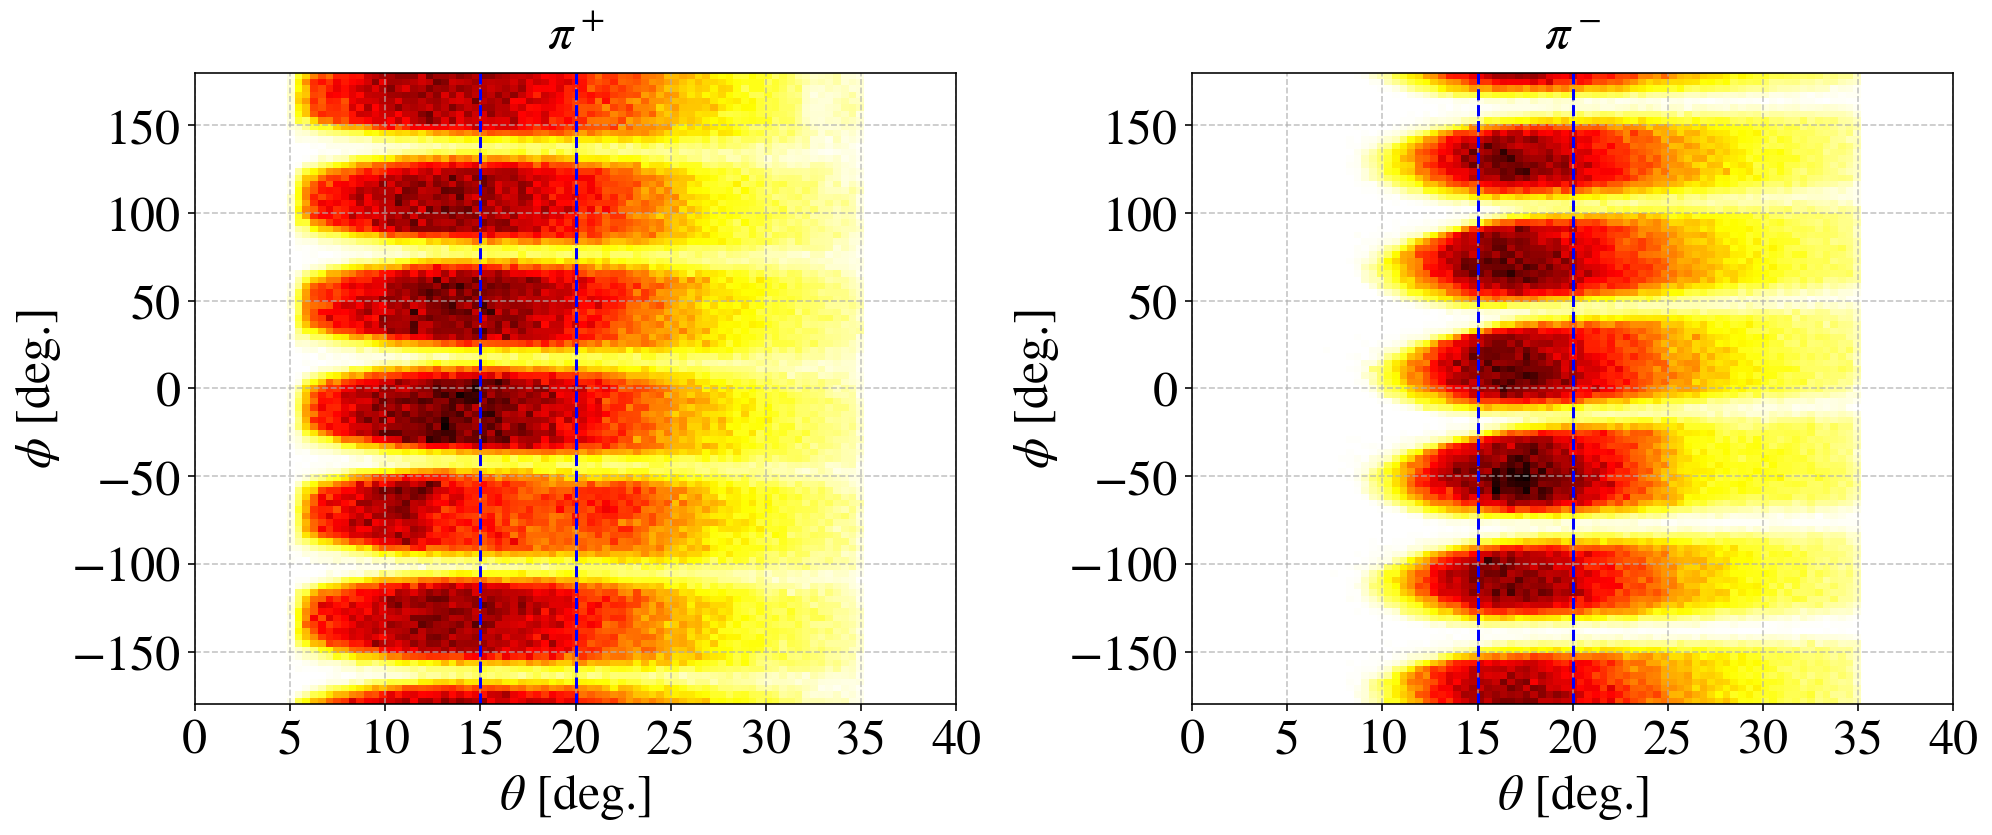

In [16]:
Nmax = 1000000
bins = (np.linspace(0,40,100),np.linspace(-180,180,100))
pips = e_e_pi['piplus'][0:Nmax]
pims = e_e_pi['piminus'][0:Nmax]

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1)
plt.hist2d( pips['pi_Theta']*r2d, pips['pi_Phi']*r2d ,bins=bins, cmap='hot_r');
plt.plot([theta_min,theta_min],[-180,180],'--b',[theta_max,theta_max],[-180,180],'--b')
set_axes(ax,'$\\theta$ [deg.]','$\phi$ [deg.]',title='$\pi^+$', do_add_grid=True)


ax = fig.add_subplot(1,2,2)
plt.hist2d( pims['pi_Theta']*r2d, pims['pi_Phi']*r2d ,bins=bins, cmap='hot_r');
plt.plot([theta_min,theta_min],[-180,180],'--b',[theta_max,theta_max],[-180,180],'--b')
set_axes(ax,'$\\theta$ [deg.]','$\phi$ [deg.]',title='$\pi^-$', do_add_grid=True)
# e_e_pi['piplus'][0:1]#['theta'][0:10]

plt.tight_layout()

### Produce the plot

In [17]:
z_bins = [0.3,0.4,0.5,0.6,0.7,0.8,0.9]
z_width = 0.01
var_e_e_pi = 'xB'
xlabel_e_e_pi   = "Bjorken $x$"

In [18]:
Rpips2pims, Rpips2pims_errup, Rpips2pims_errdw = dict(), dict(), dict()
for z_bin in z_bins:
    z_min,z_max = z_bin-z_width,z_bin+z_width
    (Rpips2pims[z_bin], 
     Rpips2pims_errup[z_bin], 
     Rpips2pims_errdw[z_bin]) = compute_ratio_pips_to_pims(df_dict=e_e_pi ,                                                                            
                                                           var=var_e_e_pi, bins=x_bins,                                                            
                                                           z_min=z_min,z_max=z_max,                                                            
                                                           theta_min=theta_min,                                                           
                                                           theta_max=theta_max)

    print(z_bin,Rpips2pims[z_bin],Rpips2pims_errup[z_bin],Rpips2pims_errdw[z_bin])
print('done')    

0.3 [1.72432071 1.81304449 1.81387864 1.81852664 1.82259008 1.86857708
 1.84699454 1.84663073 1.87011349] [0.01144769 0.01299775 0.01479995 0.01742909 0.02073885 0.02573081
 0.03094852 0.03764165 0.0474992 ] [0.01144769 0.01299775 0.01479995 0.01742909 0.02073885 0.02573081
 0.03094852 0.03764165 0.0474992 ]
0.4 [1.63014329 1.70606207 1.77364524 1.80396699 1.81486343 1.83000238
 1.79169191 1.7323924  1.79467203] [0.00947035 0.00986295 0.0110005  0.01267    0.0147081  0.01755131
 0.02080561 0.02571932 0.03550349] [0.00947035 0.00986295 0.0110005  0.01267    0.0147081  0.01755131
 0.02080561 0.02571932 0.03550349]
0.5 [1.71443402 1.75472781 1.78880959 1.82414536 1.81538287 1.78952389
 1.74227175 1.80388979 1.81485547] [0.01290724 0.01277645 0.01354674 0.01505508 0.01700775 0.0199194
 0.02392622 0.0320109  0.04323438] [0.01290724 0.01277645 0.01354674 0.01505508 0.01700775 0.0199194
 0.02392622 0.0320109  0.04323438]
0.6 [1.84909658 1.86598862 1.89170688 1.84981266 1.87255876 1.89351141
 

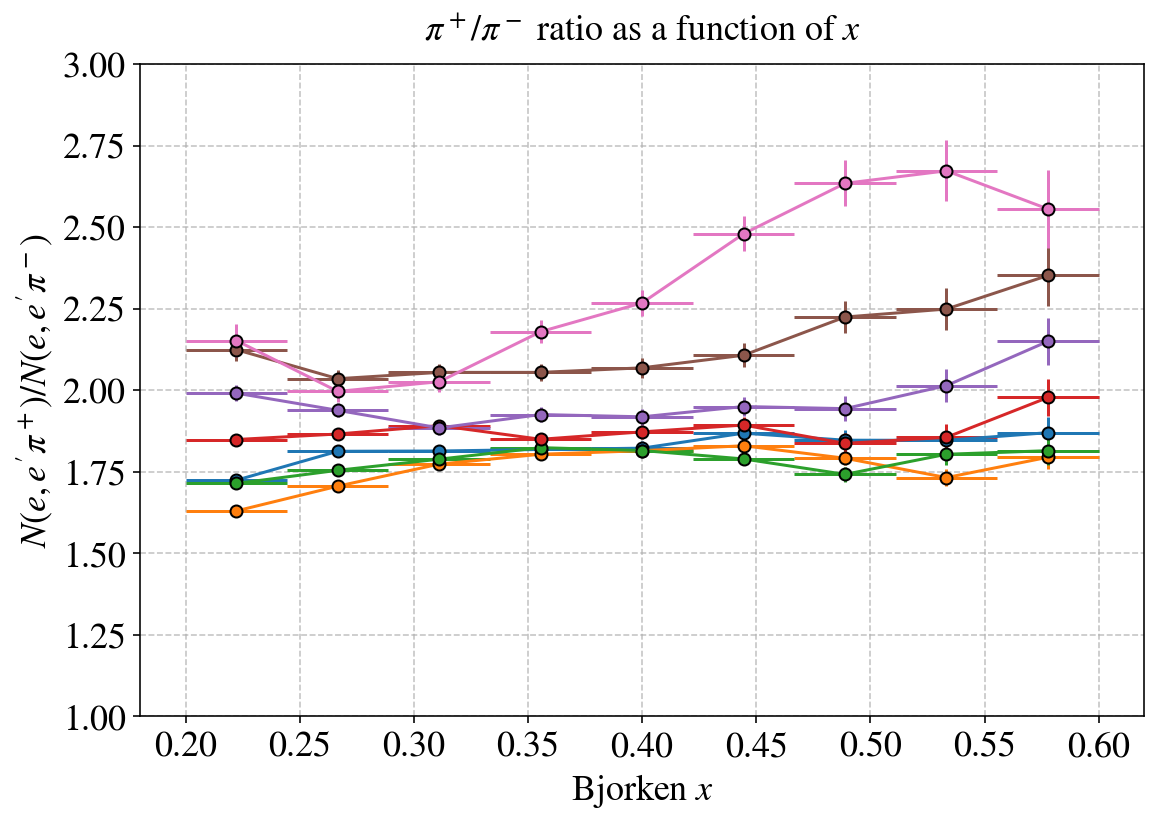

In [19]:
fig = plt.figure(figsize=(9,6))
ax  = fig.add_subplot(1,1,1)
for z_bin in z_bins:
    ax.errorbar(x=x, xerr=x_err, 
                y=Rpips2pims[z_bin], yerr=(Rpips2pims_errup[z_bin],Rpips2pims_errdw[z_bin]),
                marker='o',markeredgecolor='k',
                label='$z=%.2f\pm%.2f$'%(z_bin,z_width))
    
set_axes(ax,xlabel_e_e_pi,"$N(e,e'\pi^+)/N(e,e'\pi^-)$",title="$\pi^+/\pi^-$ ratio as a function of $x$",
         do_add_grid=True, do_add_legend=False, fontsize=fontsize,ylim=(1,3));
# ax.legend(bbox_to_anchor=(1.,1.5),loc='right',fontsize=fontsize)

### Plot the ratio to the expected SIDIS ratio 
$$\sigma^{\pi^+}_d/\sigma^{\pi^-}_d
\sim
\frac{4.58 + 0.16z^2 - 0.51 z}
{3.32 + 0.64 z^2 - 2.04z}
$$

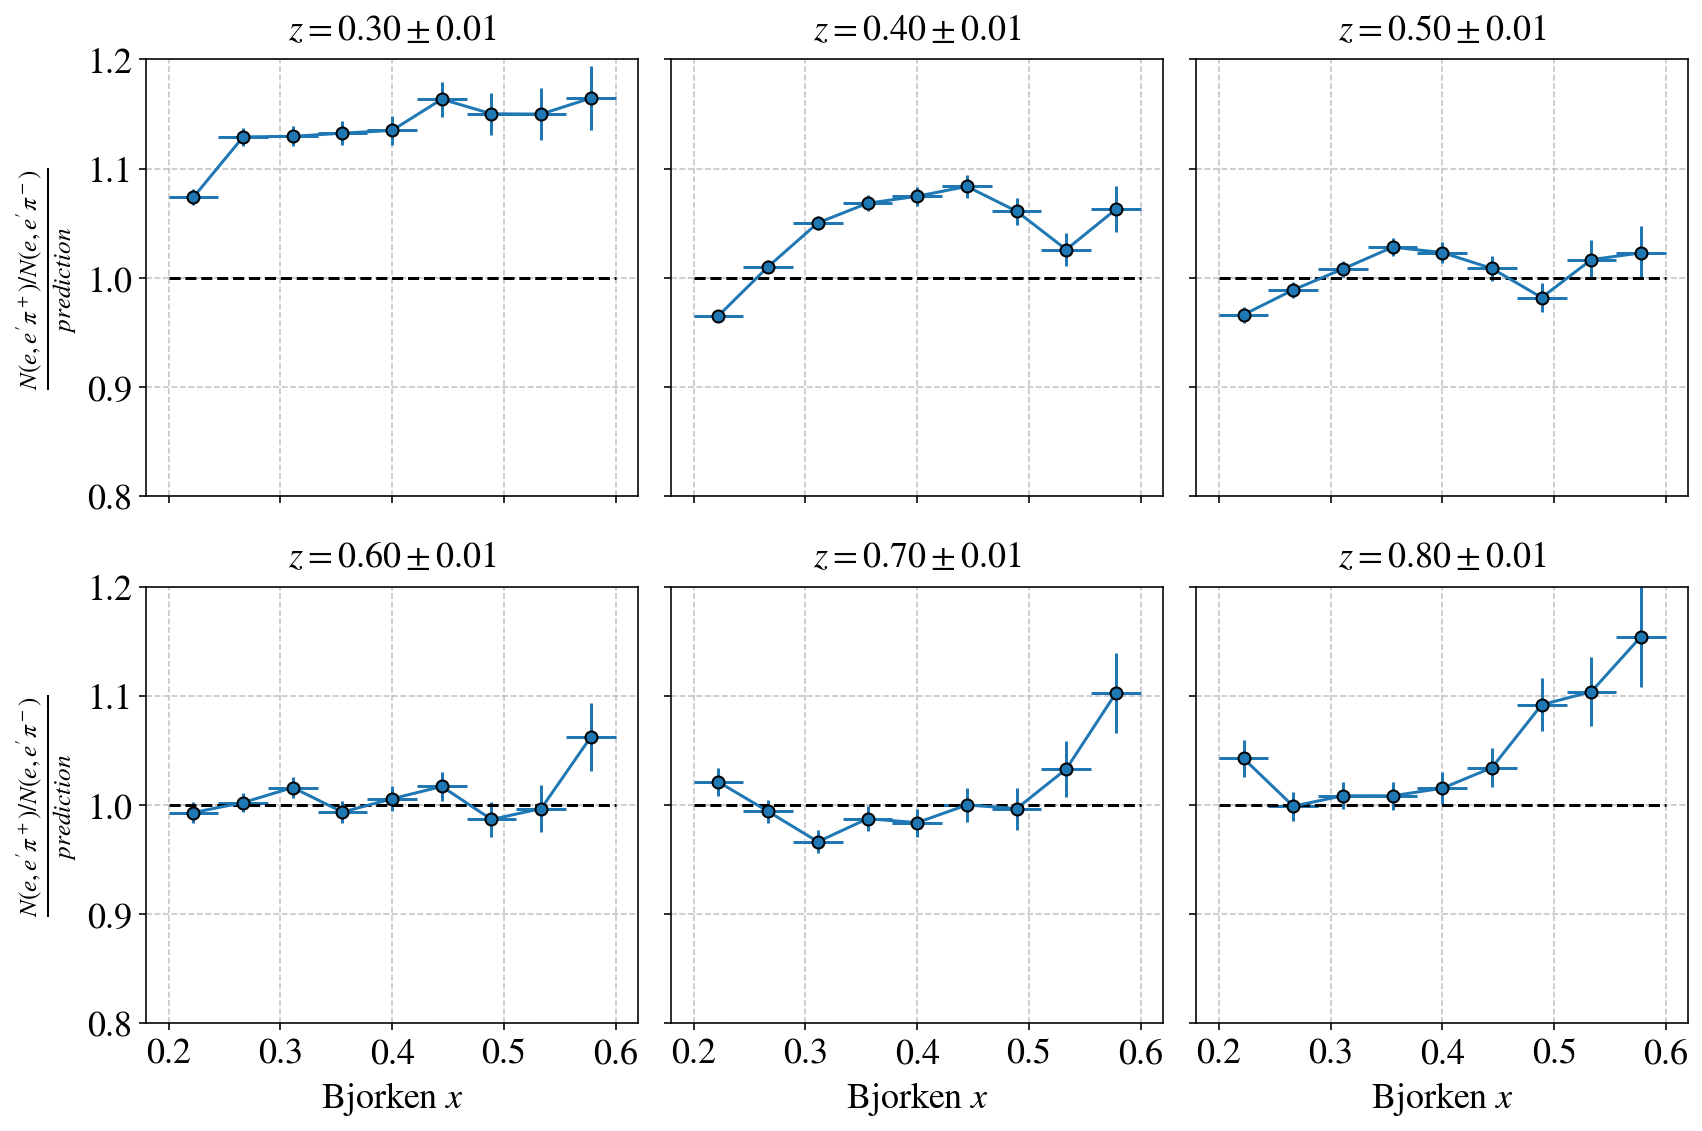

In [20]:

fig = plt.figure(figsize=(12,8))
for z_bin,subplot_idx in zip(z_bins[0:6],range(1,7)):
    ax = fig.add_subplot(2,3,subplot_idx)
    
    z = z_bin
    R_SIDIS = (4.58 + 0.16*z*z - 0.51*z)/(3.32 + 0.64*z*z - 2.04*z)
    ax.errorbar(x=x, xerr=x_err, 
                y = Rpips2pims[z_bin]/R_SIDIS, 
                yerr= (Rpips2pims_errup[z_bin]/R_SIDIS, Rpips2pims_errdw[z_bin]/R_SIDIS),
                marker='o',markeredgecolor='k',
                label='$z=%.2f\pm%.2f$'%(z_bin,z_width))
    ax.plot([0.2,0.6],[1,1],'--k')
    set_axes(ax,
             x_label=xlabel_e_e_pi if subplot_idx>3 else '',
             y_label="$\\frac{N(e,e'\pi^+)/N(e,e'\pi^-)}{prediction}$" if subplot_idx%3==1 else '',
             remove_ticks_x=False if subplot_idx>3 else True,
             remove_ticks_y=False if subplot_idx%3==1 else True,
             title="$z=%.2f\pm%.2f$"%(z_bin,z_width),
             do_add_grid=True, do_add_legend=False, fontsize=fontsize,
             ylim=(0.8,1.2),yticks=(0.8,0.9,1,1.1,1.2));

plt.tight_layout()


## Now repeat the same for with a tagged neutron , i.e. $(e,e'\pi^{\pm} n)$ events
as a function of $x'$

In [194]:
z_bins   = [0.4,0.5,0.75]
z_widths = [0.1,0.1,0.15]
x_bins   = np.linspace(0.2,0.6,5)
x        = (x_bins[1:] + x_bins[:-1])/2
x_err    = (x_bins[1:] - x_bins[:-1])/2
var_e_e_pi_n    = 'xPrime2'
xlabel_e_e_pi_n = "$x' = Q^2/(W'^2 - m_N^2 + Q^2)$"

In [198]:
Rpips2pims_n, Rpips2pims_n_errup, Rpips2pims_n_errdw = dict(), dict(), dict()
Y, dY = dict(),dict()
for z_bin,z_width in zip(z_bins,z_widths):
    z_min,z_max = z_bin-z_width,z_bin+z_width
    (Rpips2pims_n[z_bin],
     Rpips2pims_n_errup[z_bin], 
     Rpips2pims_n_errdw[z_bin]) = compute_ratio_pips_to_pims(df_dict=e_e_pi_n  , 
                                                             var=var_e_e_pi_n, 
                                                             bins=x_bins, 
                                                             z_min=z_min,z_max=z_max, 
                                                             theta_min=theta_min,
                                                             theta_max=theta_max, 
                                                             is_eepi=False)

    # fit to a constant 
    y    = Rpips2pims_n[z_bin]
    y_err= (Rpips2pims_n_errup[z_bin],Rpips2pims_n_errdw[z_bin])
    p,cov = np.polyfit(x,y,deg=0,cov=True)
    Y[z_bin],dY[z_bin] = p[0],cov[0,0]

    # print(z_bin,Rpips2pims_n[z_bin],Rpips2pims_n_errup[z_bin],Rpips2pims_n_errdw[z_bin])
print('done') 

done


### plot, and fit to a constant

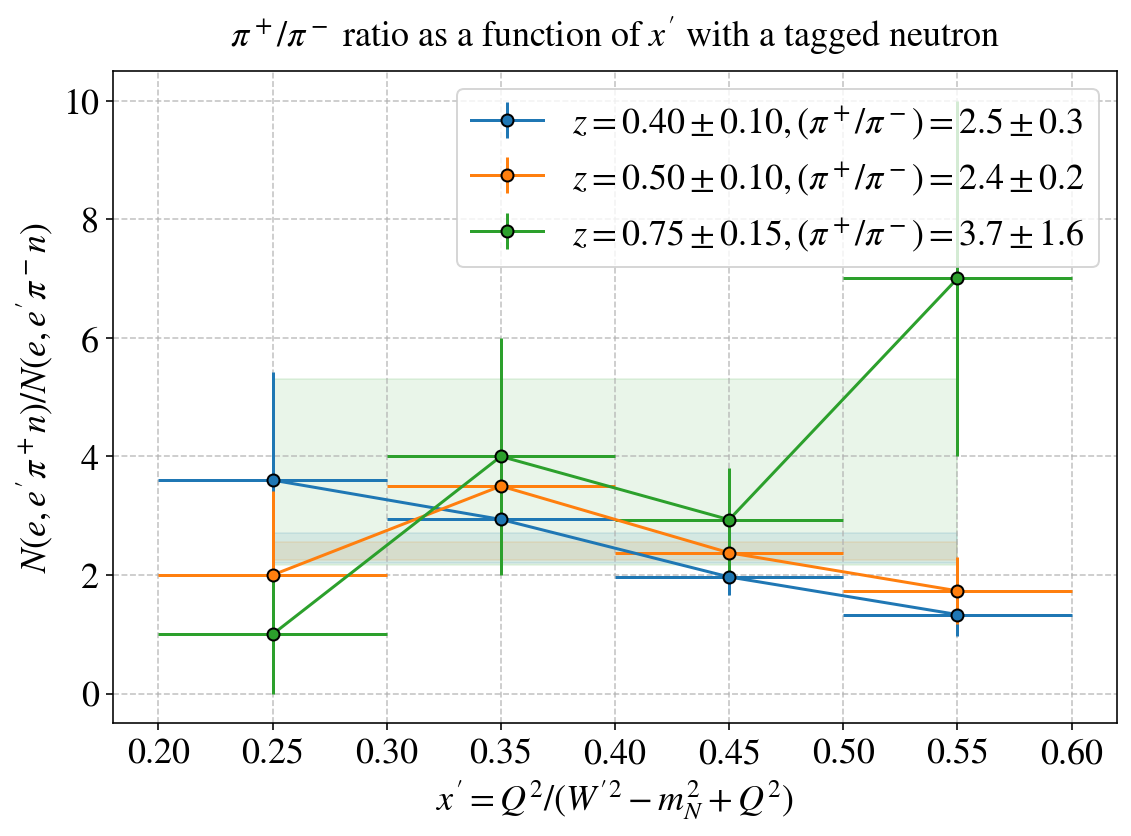

In [199]:
fig = plt.figure(figsize=(9,6))
ax  = fig.add_subplot(1,1,1)
for z_bin,z_width in zip(z_bins,z_widths):
    y    = Rpips2pims_n[z_bin]
    y_err= (Rpips2pims_n_errup[z_bin],Rpips2pims_n_errdw[z_bin])
    x_fit = np.linspace(np.min(x),np.max(x),100)
    y_dw = (Y[z_bin]-dY[z_bin])*np.ones(len(x_fit))
    y_up = (Y[z_bin]+dY[z_bin])*np.ones(len(x_fit))

    # plot
    l=ax.errorbar(x=x, xerr=x_err,  y=y, yerr=y_err,
                marker='o',markeredgecolor='k',
                label='$z=%.2f\pm%.2f, (\pi^+/\pi^-)=%.1f\pm%.1f$'%(z_bin,z_width,Y[z_bin],dY[z_bin]))
    
    ax.fill_between( x_fit, y_dw, y_up, color=l[0].get_color(), alpha=0.1)
set_axes(ax,xlabel_e_e_pi_n,"$N(e,e'\pi^+n)/N(e,e'\pi^-n)$",
         title="$\pi^+/\pi^-$ ratio as a function of $x'$ with a tagged neutron",
         do_add_grid=True, do_add_legend=True, fontsize=fontsize,
        );

### Assume $u_v^*/d_v^* = 2$ and extract the ratio to the expectation 
Where the expectation is 
$$\sigma^{\pi^{+}}/\sigma^{\pi^{-}}\sim \frac{4(u_v^*/d_v^*)+r}{4r(u_v^*/d_v^*)+1}$$

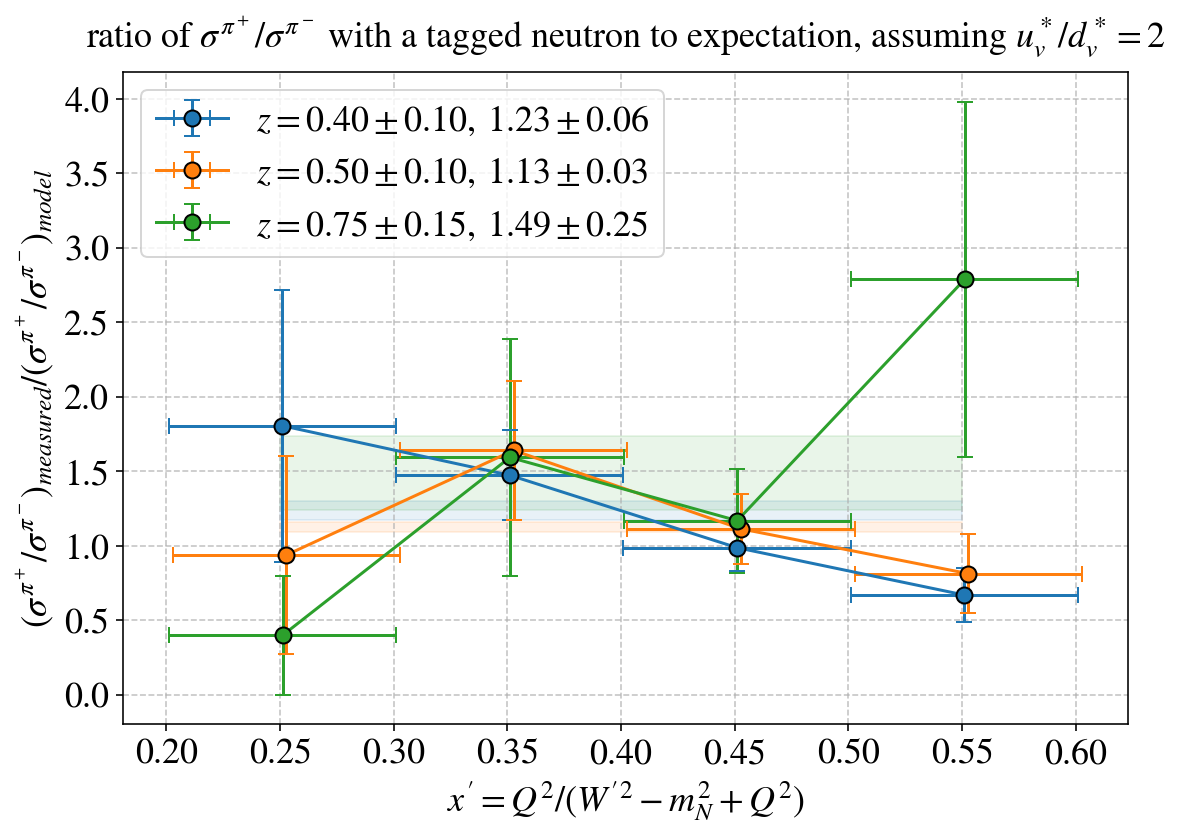

In [200]:
do_use_fit2const = True
fig = plt.figure(figsize=(9,6))
ax  = fig.add_subplot(1,1,1)
Const_R_data2exp,dConst_R_data2exp = dict(),dict()
for z_bin,z_width in zip(z_bins,z_widths):
    r = 0.16*z_bin*z_bin - 0.51*z_bin + 0.58
    u_over_d = 2.
    Rpips2pims_n_exp = (4. * u_over_d + r)/(4.*r*u_over_d + 1)
    R_data2exp = Rpips2pims_n[z_bin]/Rpips2pims_n_exp
    # uncertainty, not accounting for the width of the z-bin
    R_data2exp_errdw = Rpips2pims_n_errdw[z_bin]/Rpips2pims_n_exp
    R_data2exp_errup = Rpips2pims_n_errup[z_bin]/Rpips2pims_n_exp        
    
    # fit to a constant 
    p,cov = np.polyfit(x,R_data2exp,deg=0,cov=True)
    Const_R_data2exp[z_bin],dConst_R_data2exp[z_bin] = p[0],cov[0,0]
    
    # plot
    l=ax.errorbar(x=x+0.001*np.random.uniform(len(x)), xerr=x_err,  
                  y=R_data2exp, 
                  yerr=(R_data2exp_errdw,R_data2exp_errup),
                  marker='o',markeredgecolor='k',capsize=4,markersize=8,
                  label='$z=%.2f\pm%.2f, \; %.2f\pm%.2f$'%(z_bin,z_width,Const_R_data2exp[z_bin],dConst_R_data2exp[z_bin]))
    
    x_fit = np.linspace(np.min(x),np.max(x),100)
    y_dw = (Const_R_data2exp[z_bin]-dConst_R_data2exp[z_bin])*np.ones(len(x_fit))
    y_up = (Const_R_data2exp[z_bin]+dConst_R_data2exp[z_bin])*np.ones(len(x_fit))    
    ax.fill_between( x_fit, y_dw, y_up, color=l[0].get_color(), alpha=0.1)

    
set_axes(ax,xlabel_e_e_pi_n,"$ (\sigma^{\pi^+}/\sigma^{\pi^-})_{measured} / (\sigma^{\pi^+}/\sigma^{\pi^-})_{model}$",
         title="ratio of $\sigma^{\pi^+}/\sigma^{\pi^-}$ with a tagged neutron to expectation, assuming $u_v^*/d_v^*=2$",
         do_add_grid=True, do_add_legend=True, fontsize=fontsize,);
ax.legend(fontsize=fontsize,loc='upper left')

### Extract $u_v^*/d_v^*$ without assuming its 2
from
$$\sigma^{\pi^{+}}/\sigma^{\pi^{-}}\sim \frac{4(u_v^*/d_v^*)+r}{4r(u_v^*/d_v^*)+1}$$
we get
$$u_v^*/d_v^* \sim \frac{1}{4}\frac{y - r }{1 - ry}$$
where $y = \frac{\sigma^{\pi^+}}{\sigma^{\pi^-}}$, which only works well away from $ry=1$.
and the uncertainty is
$$\Delta (u_v^*/d_v^*) = \frac{1}{4}\frac{\Delta y}{1 - ry}\left(1 + \frac{r(y-r)}{1-ry}  \right)$$,

z= 0.4 ,r= 0.40159999999999996 ,y= 2.459511612021858 r*y= 0.9877398633879781
z= 0.5 ,r= 0.365 ,y= 2.4020833333333327 r*y= 0.8767604166666664
z= 0.75 ,r= 0.2875 ,y= 3.7333333333333325 r*y= 1.073333333333333


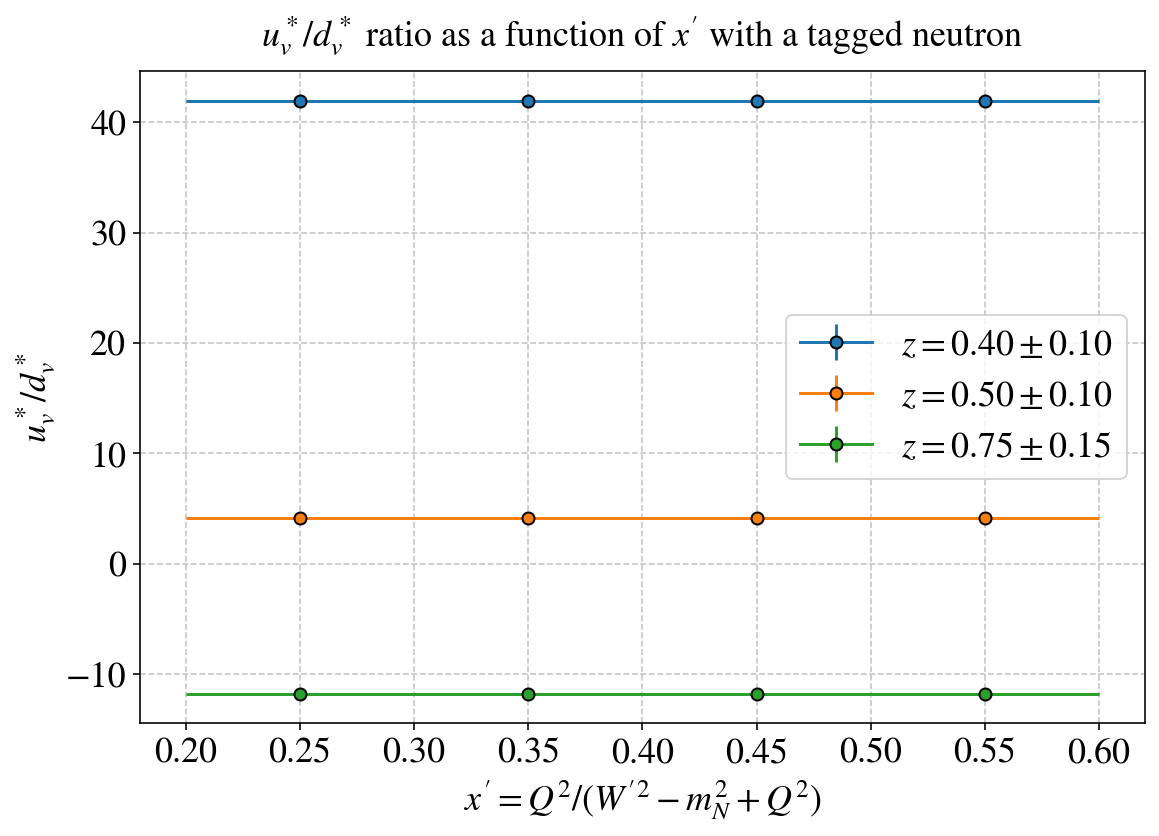

In [105]:
do_use_fit2const = True
fig = plt.figure(figsize=(9,6))
ax  = fig.add_subplot(1,1,1)

for z_bin,z_width in zip(z_bins,z_widths):
    r = 0.16*z_bin*z_bin - 0.51*z_bin + 0.58
    
    if do_use_fit2const:
        y    = Y[z_bin]*np.ones(len(x))
        dy_dw= dY[z_bin]*np.ones(len(x))
        dy_up= dY[z_bin]*np.ones(len(x))                                
        print('z=',z_bin,',r=',r,',y=',Y[z_bin],'r*y=',r*Y[z_bin])

    else:
        y    = Rpips2pims_n[z_bin]
        dy_dw= Rpips2pims_n_errdw[z_bin]
        dy_dw= Rpips2pims_n_errdw[z_bin]                                 


    # using the results for a fit to a constant
    u_over_d       = (1./4) * (y - r) / (1 - r*y)
    u_over_d_errdw = (1./4) * (dy_dw/(1 - r*y)) * ( 1 + (r*y)/(1 - r*y))
    u_over_d_errup = (1./4) * (dy_up/(1 - r*y)) * ( 1 + (r*y)/(1 - r*y))
    
    # u_over_d_errdw = u_over_d * np.sqrt( np.sqaure( Rpips2pims_n_errdw[z_bin]/Rpips2pims_n[z_bin] ) + np.square(dY[z_bin]/Y[z_bin]))
    # u_over_d_errup = u_over_d * np.sqrt( np.sqaure( Rpips2pims_n_errup[z_bin]/Rpips2pims_n[z_bin] ) + np.square(dY[z_bin]/Y[z_bin]))

    # plot
    l=ax.errorbar(x=x, xerr=x_err,  
                  y=u_over_d, 
                  yerr=(0*u_over_d_errdw,0*u_over_d_errup),
                  marker='o',markeredgecolor='k',
                  label='$z=%.2f\pm%.2f$'%(z_bin,z_width))
        
set_axes(ax,xlabel_e_e_pi_n,"$u_v^*/d_v^*$",
         title="$u_v^*/d_v^*$ ratio as a function of $x'$ with a tagged neutron",
         do_add_grid=True, do_add_legend=True, fontsize=fontsize,
        );

# Is there a background contamination at high-$z$ ?
We can check with in inclusive data

In [159]:
z_bins = [0.4,0.5,0.6,0.7,0.8,0.9]
z_widths = 0.05*np.ones(len(z_bins))

Nmax = 100000
var = 'M_X'
Mx_bins = np.linspace(1,5,30)

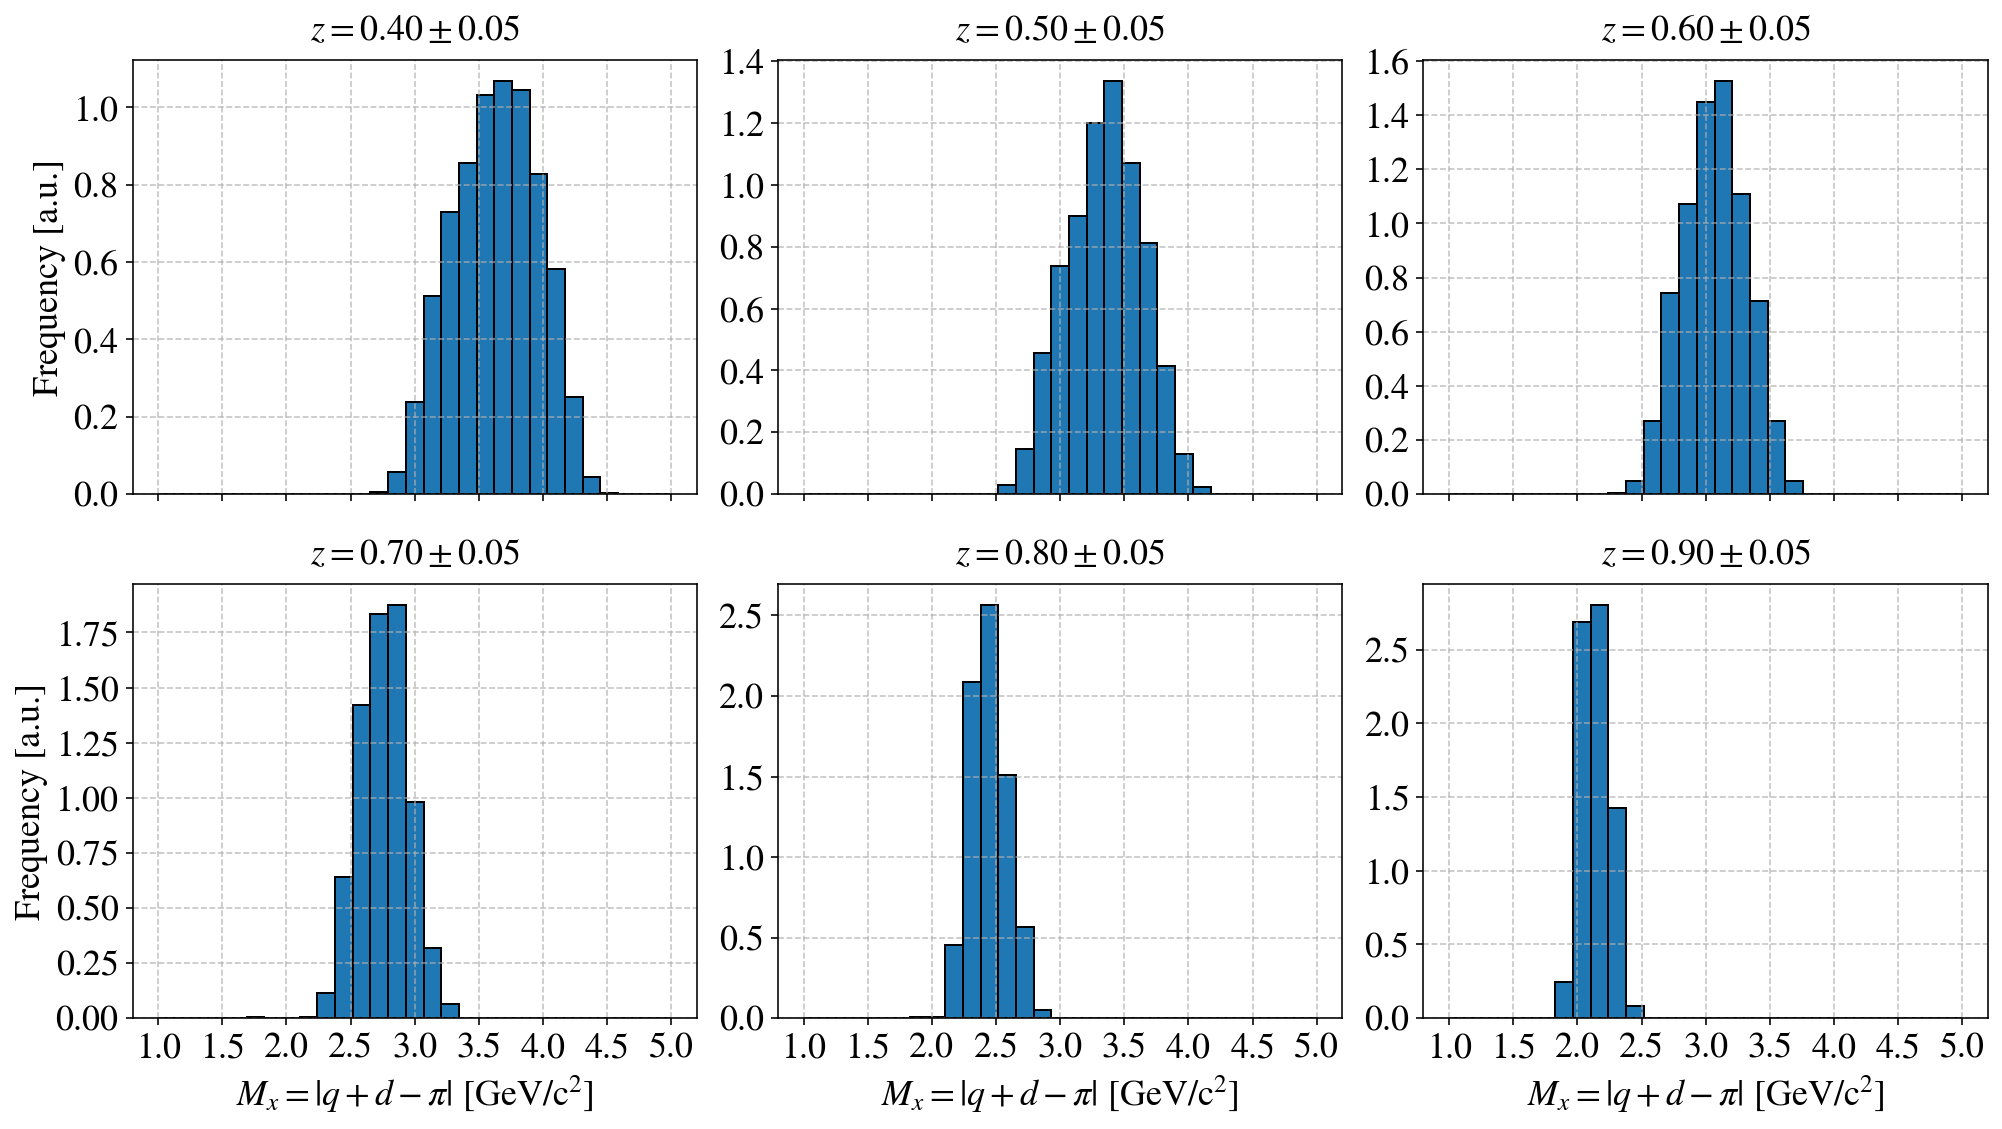

In [165]:

fig = plt.figure(figsize=(14,8))

for z_bin,z_width,z_idx in zip(z_bins,z_widths,range(len(z_bins))):#{
    z_min,z_max = z_bin-z_width,z_bin+z_width

    df_pips = e_e_pi['piplus'][0:Nmax]
    df_pips = df_pips[ (z_min<df_pips.Zpi) & (df_pips.Zpi<z_max) & (theta_min<df_pips.pi_Theta*r2d) & (df_pips.pi_Theta*r2d<theta_max)]
    Mx_pips = df_pips[var]
    ax  = fig.add_subplot(2,3,z_idx+1)
    plt.hist( Mx_pips, bins=Mx_bins, edgecolor='k' , density=True)
    set_axes(ax,"$M_x = |q + d - \pi|$ [GeV/c$^2$]" if z_idx>2 else "",
             "Frequency [a.u.]" if z_idx%3==0 else "",
             remove_ticks_x=False if z_idx>2 else True,
             title="$z = %.2f \pm %.2f$" %(z_bin,z_width),
         do_add_grid=True, do_add_legend=False, fontsize=fontsize);
#}
plt.tight_layout()

## Check what happens to the SIDIS ratio if we remove quasielastic background of $M_x \simeq 2$

In [174]:
z_bins        = [0.3,0.4,0.5,0.6,0.7,0.8,0.9]
z_width       = 0.01
var_e_e_pi    = 'xB'
xlabel_e_e_pi = "Bjorken $x$"
x_bins        = np.linspace(0.2,0.6,10) #np.concatenate([np.linspace(0.2,0.45,6), np.linspace(0.5,0.75,8) ])
x             = (x_bins[1:] + x_bins[:-1])/2
x_err         = (x_bins[1:] - x_bins[:-1])/2
Mx_min = 2.5
Mx_max = 5

In [172]:
Rpips2pims, Rpips2pims_errup, Rpips2pims_errdw = dict(), dict(), dict()
for z_bin in z_bins:
    z_min,z_max = z_bin-z_width,z_bin+z_width
    (Rpips2pims[z_bin], 
     Rpips2pims_errup[z_bin], 
     Rpips2pims_errdw[z_bin]) = compute_ratio_pips_to_pims(df_dict=e_e_pi ,                                                                            
                                                           var=var_e_e_pi, bins=x_bins,                                                            
                                                           z_min=z_min,z_max=z_max,                                                            
                                                           theta_min=theta_min,                                                           
                                                           theta_max=theta_max, 
                                                           Mx_min=Mx_min, Mx_max=Mx_max)
    print(z_bin,Rpips2pims[z_bin],Rpips2pims_errup[z_bin],Rpips2pims_errdw[z_bin])
print('done')   

0.3 [1.72432071 1.81304449 1.81387864 1.81852664 1.82259008 1.86857708
 1.84699454 1.84663073 1.87011349] [0.01144769 0.01299775 0.01479995 0.01742909 0.02073885 0.02573081
 0.03094852 0.03764165 0.0474992 ] [0.01144769 0.01299775 0.01479995 0.01742909 0.02073885 0.02573081
 0.03094852 0.03764165 0.0474992 ]
0.4 [1.63014329 1.70606207 1.77364524 1.80396699 1.81486343 1.83000238
 1.79169191 1.7323924  1.79467203] [0.00947035 0.00986295 0.0110005  0.01267    0.0147081  0.01755131
 0.02080561 0.02571932 0.03550349] [0.00947035 0.00986295 0.0110005  0.01267    0.0147081  0.01755131
 0.02080561 0.02571932 0.03550349]
0.5 [1.71443402 1.75472781 1.78889666 1.82429339 1.81598186 1.7904959
 1.74468851 1.80360762 1.81508605] [0.01290724 0.01277645 0.01354803 0.01506106 0.01702393 0.01994255
 0.02397491 0.03201327 0.04325473] [0.01290724 0.01277645 0.01354803 0.01506106 0.01702393 0.01994255
 0.02397491 0.03201327 0.04325473]
0.6 [1.8495643  1.86637135 1.89263821 1.85105704 1.87568922 1.89779368


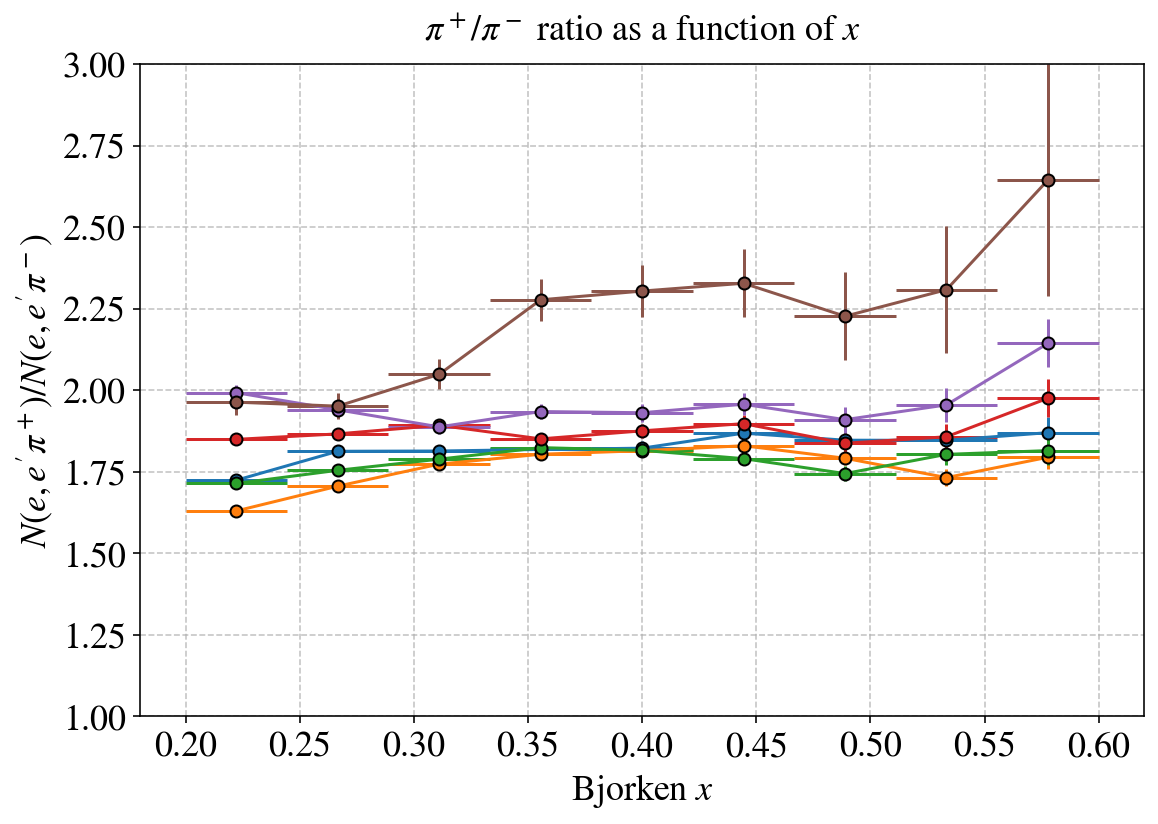

In [175]:
fig = plt.figure(figsize=(9,6))
ax  = fig.add_subplot(1,1,1)
for z_bin in z_bins:
    ax.errorbar(x=x, xerr=x_err, 
                y=Rpips2pims[z_bin], yerr=(Rpips2pims_errup[z_bin],Rpips2pims_errdw[z_bin]),
                marker='o',markeredgecolor='k',
                label='$z=%.2f\pm%.2f$'%(z_bin,z_width))
    
set_axes(ax,xlabel_e_e_pi,"$N(e,e'\pi^+)/N(e,e'\pi^-)$",title="$\pi^+/\pi^-$ ratio as a function of $x$",
         do_add_grid=True, do_add_legend=False, fontsize=fontsize,ylim=(1,3));

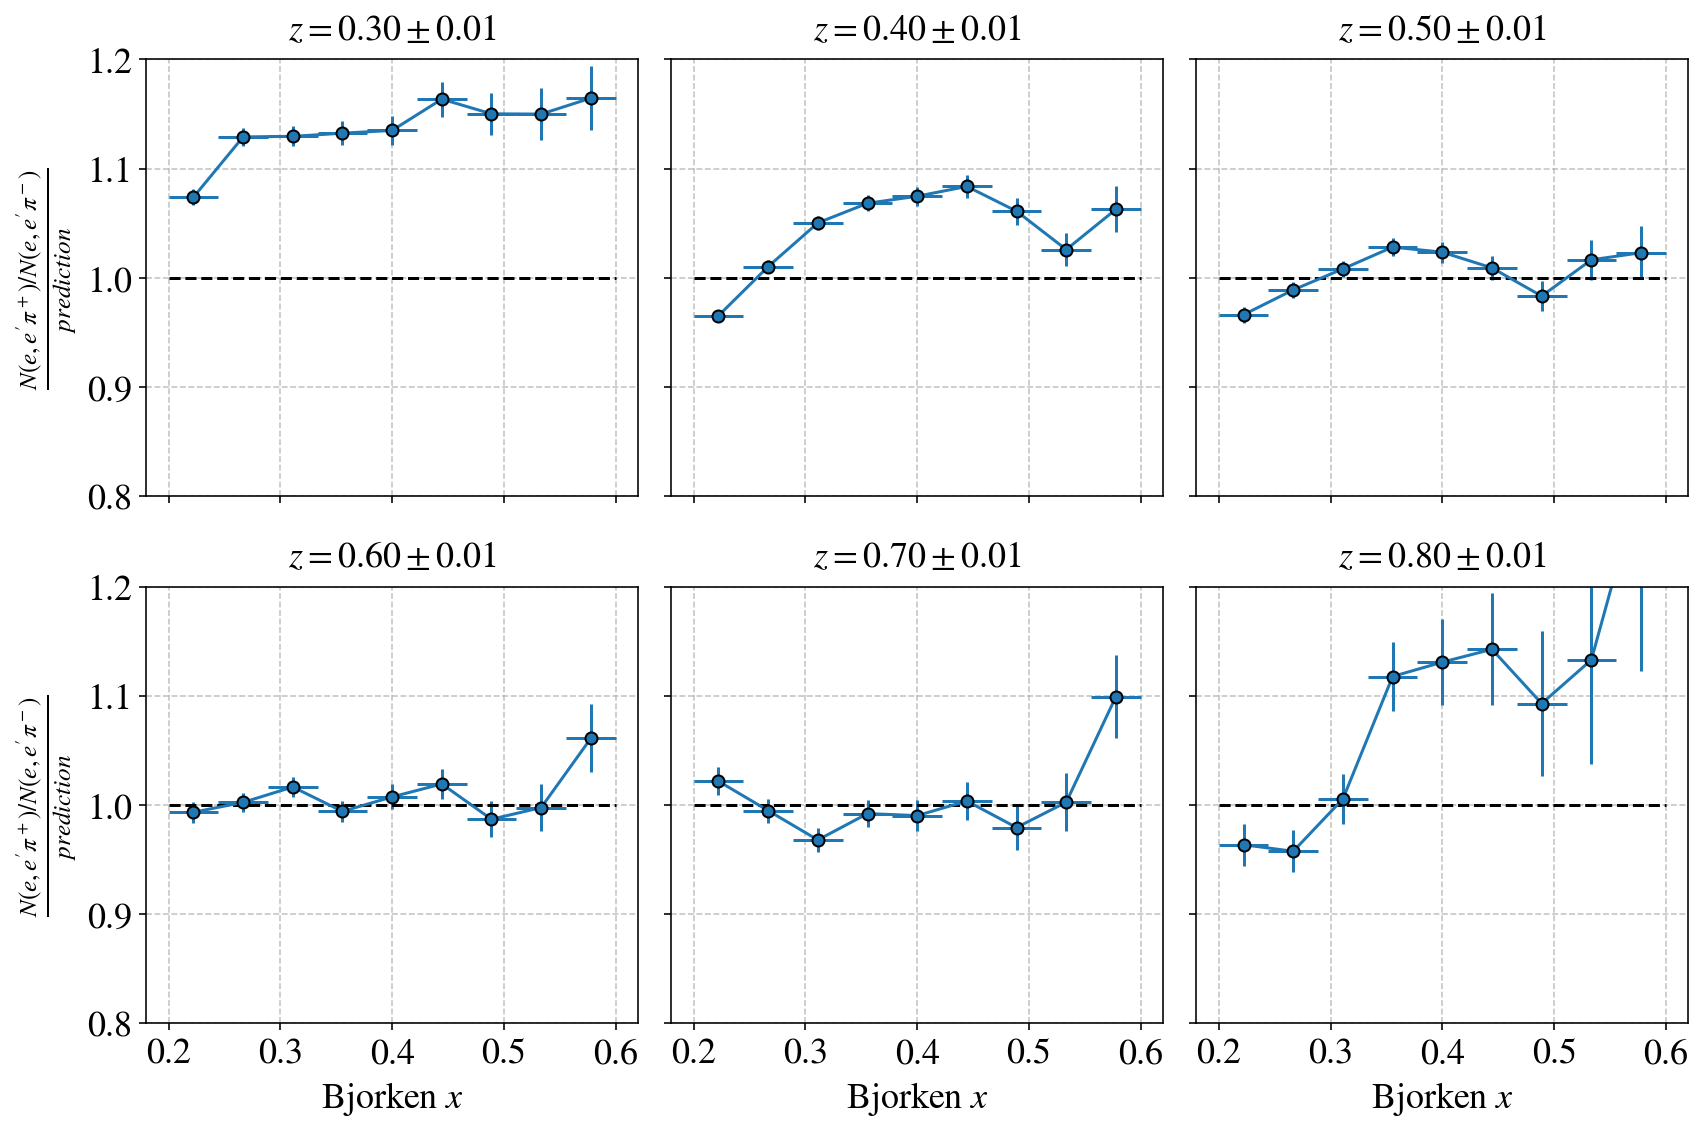

In [176]:
fig = plt.figure(figsize=(12,8))
for z_bin,subplot_idx in zip(z_bins[0:6],range(1,7)):
    ax = fig.add_subplot(2,3,subplot_idx)
    
    z = z_bin
    R_SIDIS = (4.58 + 0.16*z*z - 0.51*z)/(3.32 + 0.64*z*z - 2.04*z)
    ax.errorbar(x=x, xerr=x_err, 
                y = Rpips2pims[z_bin]/R_SIDIS, 
                yerr= (Rpips2pims_errup[z_bin]/R_SIDIS, Rpips2pims_errdw[z_bin]/R_SIDIS),
                marker='o',markeredgecolor='k',
                label='$z=%.2f\pm%.2f$'%(z_bin,z_width))
    ax.plot([0.2,0.6],[1,1],'--k')
    set_axes(ax,
             x_label=xlabel_e_e_pi if subplot_idx>3 else '',
             y_label="$\\frac{N(e,e'\pi^+)/N(e,e'\pi^-)}{prediction}$" if subplot_idx%3==1 else '',
             remove_ticks_x=False if subplot_idx>3 else True,
             remove_ticks_y=False if subplot_idx%3==1 else True,
             title="$z=%.2f\pm%.2f$"%(z_bin,z_width),
             do_add_grid=True, do_add_legend=False, fontsize=fontsize,
             ylim=(0.8,1.2),yticks=(0.8,0.9,1,1.1,1.2));

plt.tight_layout()

# How does the $(\pi^+ + \pi^-)/(\pi^+ - \pi^-)$ look like?

In [190]:
Rassymetry, Rassymetry_errup, Rassymetry_errdw = dict(), dict(), dict()
for z_bin in z_bins:
    z_min,z_max = z_bin-z_width,z_bin+z_width
    (Rassymetry[z_bin], 
     Rassymetry_errup[z_bin], 
     Rassymetry_errdw[z_bin]) = compute_ratio_assymetry(df_dict=e_e_pi ,                                                                            
                                                           var=var_e_e_pi, bins=x_bins,                                                            
                                                           z_min=z_min,z_max=z_max,                                                            
                                                           theta_min=theta_min,                                                           
                                                           theta_max=theta_max, 
                                                           Mx_min=Mx_min, Mx_max=Mx_max)
    print(z_bin,Rassymetry[z_bin],Rassymetry_errup[z_bin],Rassymetry_errdw[z_bin])
print('done') 

0.3 [3.76120783 3.45989    3.45736884 3.44341467 3.43134465 3.30261661
 3.36129032 3.362305   3.29855072] [0.02182006 0.01966254 0.02234297 0.02601412 0.0306491  0.03410647
 0.04313986 0.05251466 0.06273855] [0.02182006 0.01966254 0.02234297 0.02601412 0.0306491  0.03410647
 0.04313986 0.05251466 0.06273855]
0.4 [4.17388129 3.83261213 3.58516422 3.48766431 3.454399   3.40963165
 3.52623524 3.73077657 3.51676154] [0.02384994 0.01978432 0.01837929 0.01960199 0.02215068 0.02547715
 0.03319464 0.04794815 0.05622056] [0.02384994 0.01978432 0.01837929 0.01960199 0.02215068 0.02547715
 0.03319464 0.04794815 0.05622056]
0.5 [3.79941875 3.64996197 3.53518631 3.42632057 3.45103487 3.5300574
 3.68568665 3.4887768  3.45372866] [0.02528769 0.02243002 0.02176887 0.02216623 0.02556812 0.03191401
 0.04323223 0.04957263 0.06510685] [0.02528769 0.02243002 0.02176887 0.02216623 0.02556812 0.03191401
 0.04323223 0.04957263 0.06510685]
0.6 [3.3541479  3.30847891 3.2405494  3.35001876 3.28391528 3.22768332


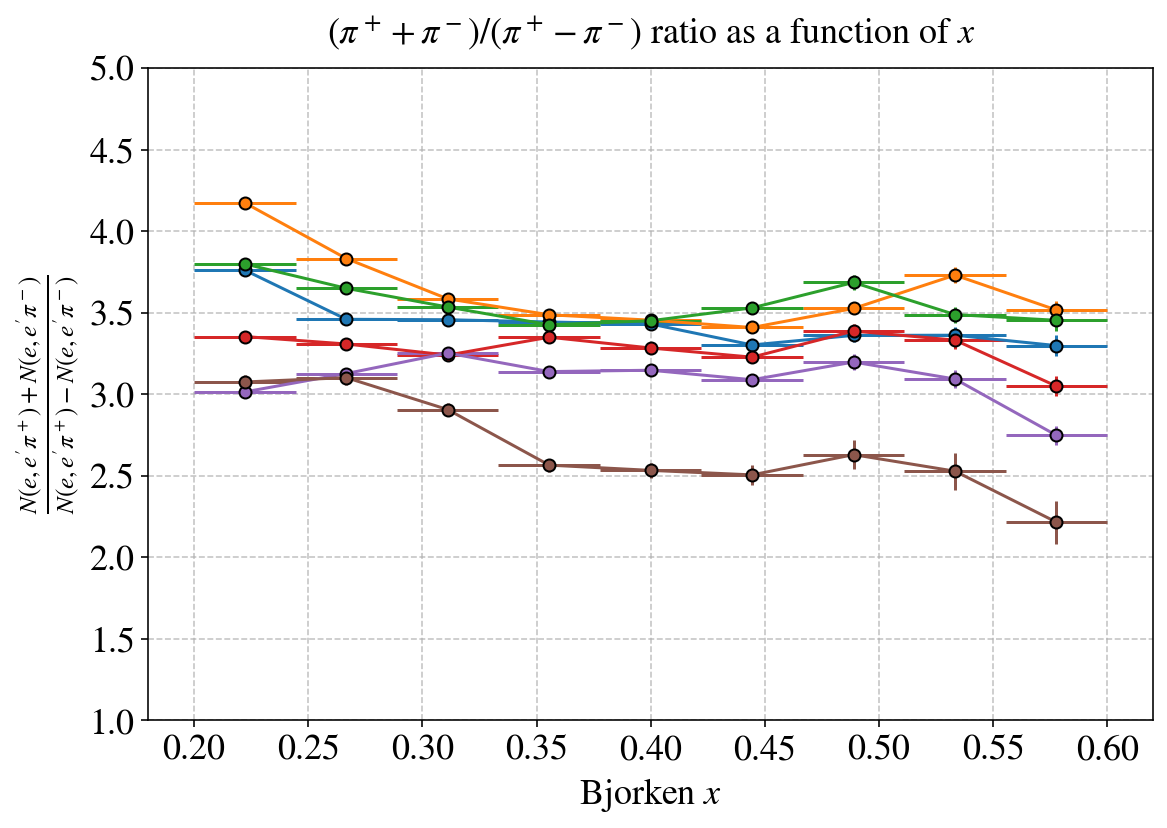

In [191]:
fig = plt.figure(figsize=(9,6))
ax  = fig.add_subplot(1,1,1)
for z_bin in z_bins:
    ax.errorbar(x=x, xerr=x_err, 
                y=Rassymetry[z_bin],yerr=(Rassymetry_errup[z_bin],Rassymetry_errdw[z_bin]),
                marker='o',markeredgecolor='k',
                label='$z=%.2f\pm%.2f$'%(z_bin,z_width))
    
set_axes(ax,xlabel_e_e_pi,"$\\frac{N(e,e'\pi^+) + N(e,e'\pi^-)}{N(e,e'\pi^+) - N(e,e'\pi^-)}$",
         title="$(\pi^+ + \pi^-)/(\pi^+ - \pi^-)$ ratio as a function of $x$",
         do_add_grid=True, do_add_legend=False, fontsize=fontsize,
         ylim=(1,5)
        );

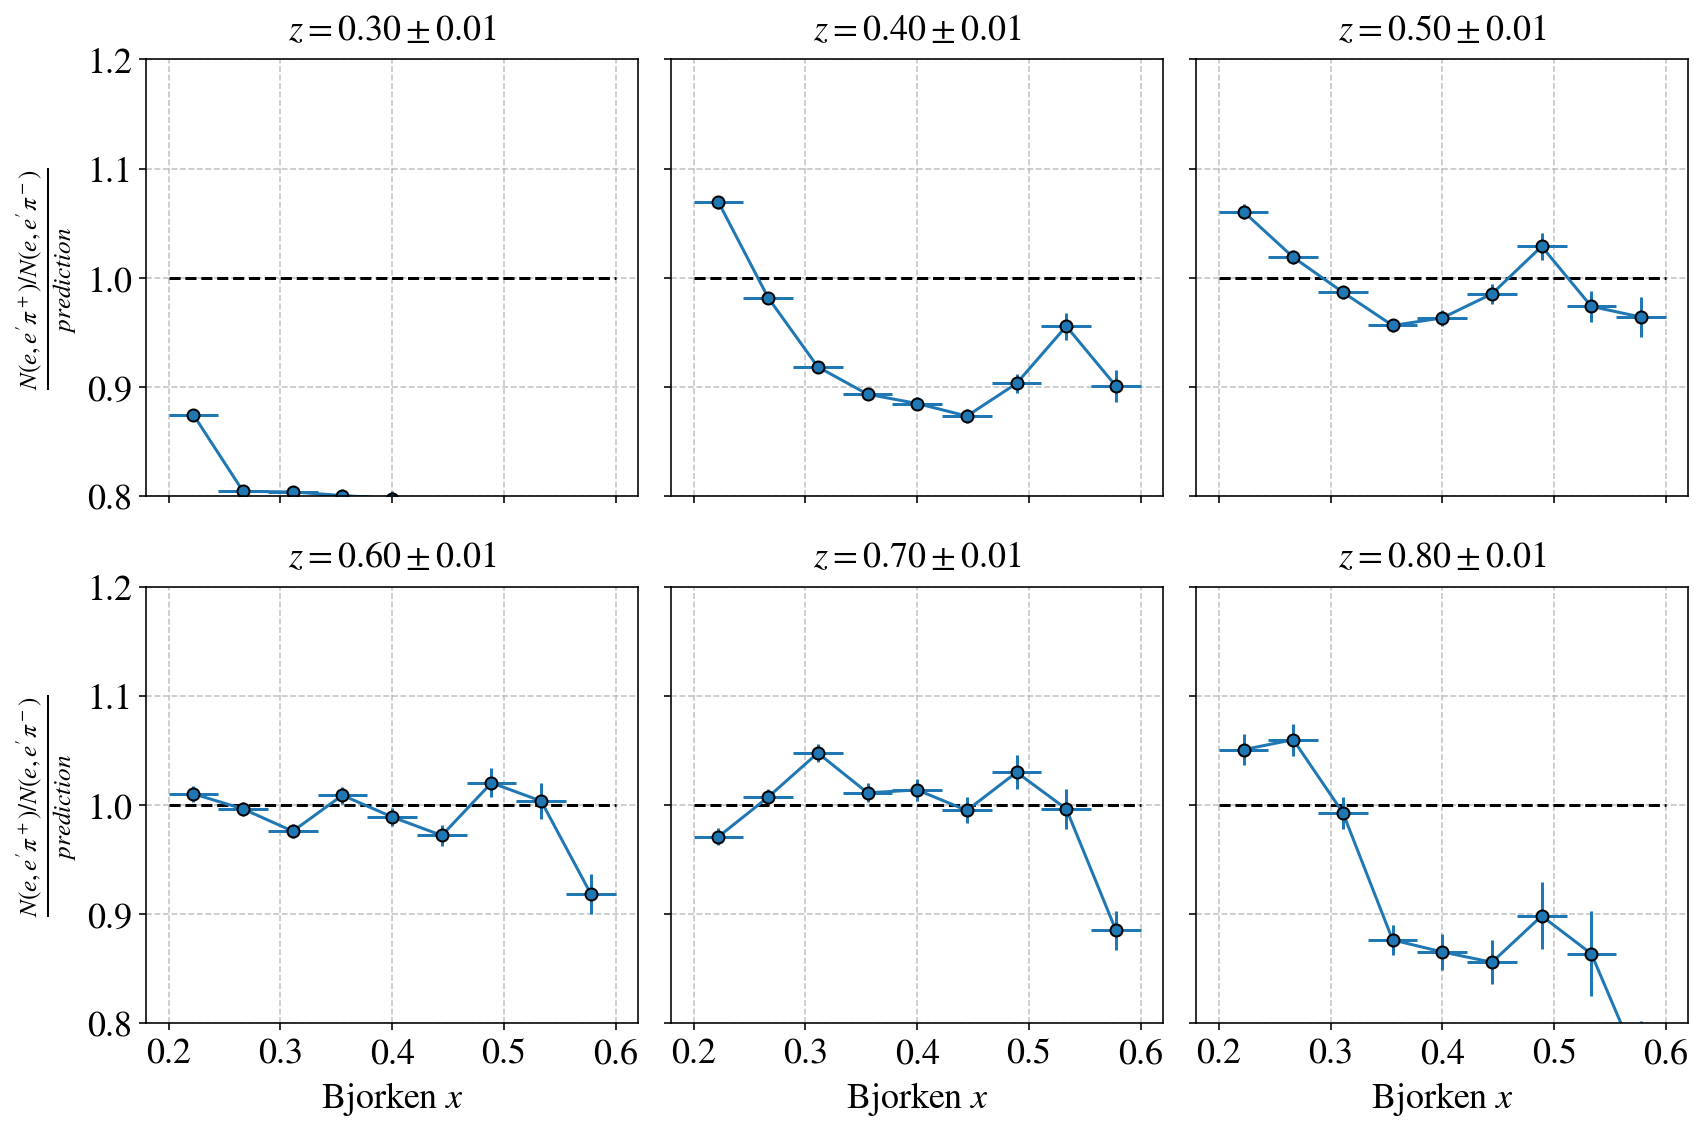

In [192]:
fig = plt.figure(figsize=(12,8))
for z_bin,subplot_idx in zip(z_bins[0:6],range(1,7)):
    ax = fig.add_subplot(2,3,subplot_idx)
    
    z = z_bin
    r = 0.16*z*z - 0.51*z + 0.58
    R_SIDIS = (5./3)*(1+r)/(1-r)
    ax.errorbar(x=x, xerr=x_err, 
                y = Rassymetry[z_bin]/R_SIDIS, 
                yerr= (Rassymetry_errup[z_bin]/R_SIDIS, Rassymetry_errdw[z_bin]/R_SIDIS),
                marker='o',markeredgecolor='k',
                label='$z=%.2f\pm%.2f$'%(z_bin,z_width))
    ax.plot([0.2,0.6],[1,1],'--k')
    set_axes(ax,
             x_label=xlabel_e_e_pi if subplot_idx>3 else '',
             y_label="$\\frac{N(e,e'\pi^+)/N(e,e'\pi^-)}{prediction}$" if subplot_idx%3==1 else '',
             remove_ticks_x=False if subplot_idx>3 else True,
             remove_ticks_y=False if subplot_idx%3==1 else True,
             title="$z=%.2f\pm%.2f$"%(z_bin,z_width),
             do_add_grid=True, do_add_legend=False, fontsize=fontsize,
             ylim=(0.8,1.2),yticks=(0.8,0.9,1,1.1,1.2));

plt.tight_layout()

## Now repeat the same for with a tagged neutron , i.e. $(e,e'\pi^{\pm} n)$ events
as a function of $x'$

In [201]:
z_bins   = [0.4,0.5,0.75]
z_widths = [0.1,0.1,0.15]
x_bins   = np.linspace(0.2,0.6,5)
x        = (x_bins[1:] + x_bins[:-1])/2
x_err    = (x_bins[1:] - x_bins[:-1])/2
var_e_e_pi_n    = 'xPrime2'
xlabel_e_e_pi_n = "$x' = Q^2/(W'^2 - m_N^2 + Q^2)$"

In [202]:
Rassymetry_n, Rassymetry_n_errup, Rassymetry_n_errdw = dict(), dict(), dict()
Y, dY = dict(),dict()
for z_bin,z_width in zip(z_bins,z_widths):
    z_min,z_max = z_bin-z_width,z_bin+z_width
    (Rassymetry_n[z_bin],
     Rassymetry_n_errup[z_bin], 
     Rassymetry_n_errdw[z_bin]) = compute_ratio_assymetry(df_dict=e_e_pi_n  , 
                                                             var=var_e_e_pi_n, 
                                                             bins=x_bins, 
                                                             z_min=z_min,z_max=z_max, 
                                                             theta_min=theta_min,
                                                             theta_max=theta_max, 
                                                             is_eepi=False)

    # fit to a constant 
    y    = Rassymetry_n[z_bin]
    y_err= (Rassymetry_n_errup[z_bin],Rassymetry_n_errdw[z_bin])
    p,cov = np.polyfit(x,y,deg=0,cov=True)
    Y[z_bin],dY[z_bin] = p[0],cov[0,0]

    # print(z_bin,Rpips2pims_n[z_bin],Rpips2pims_n_errup[z_bin],Rpips2pims_n_errdw[z_bin])
print('done') 

done


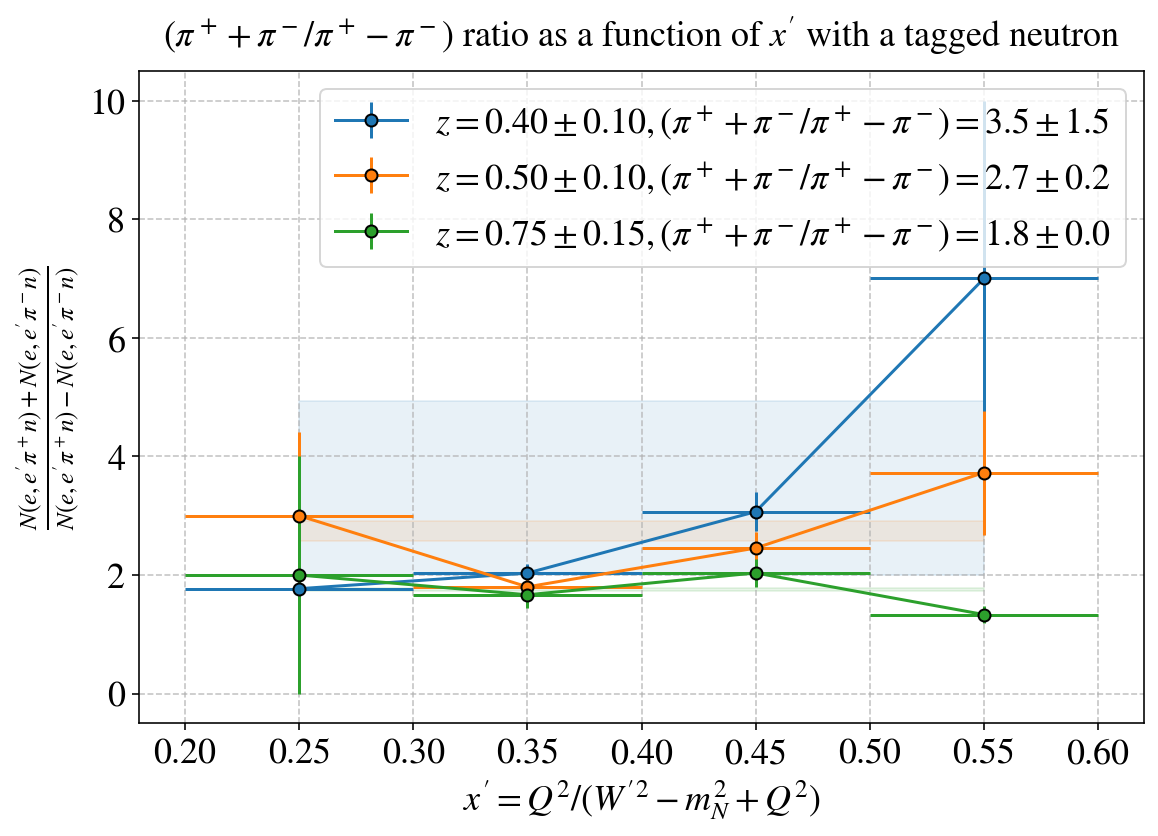

In [204]:
fig = plt.figure(figsize=(9,6))
ax  = fig.add_subplot(1,1,1)
for z_bin,z_width in zip(z_bins,z_widths):
    y    = Rassymetry_n[z_bin]
    y_err= (Rassymetry_n_errup[z_bin],Rassymetry_n_errdw[z_bin])
    x_fit = np.linspace(np.min(x),np.max(x),100)
    y_dw = (Y[z_bin]-dY[z_bin])*np.ones(len(x_fit))
    y_up = (Y[z_bin]+dY[z_bin])*np.ones(len(x_fit))

    # plot
    l=ax.errorbar(x=x, xerr=x_err,  y=y, yerr=y_err,
                marker='o',markeredgecolor='k',
                label='$z=%.2f\pm%.2f, (\pi^++\pi^-/\pi^+-\pi^-)=%.1f\pm%.1f$'%(z_bin,z_width,Y[z_bin],dY[z_bin]))
    
    ax.fill_between( x_fit, y_dw, y_up, color=l[0].get_color(), alpha=0.1)
set_axes(ax,xlabel_e_e_pi_n,"$\\frac{N(e,e'\pi^+n)+N(e,e'\pi^-n)}{N(e,e'\pi^+n)-N(e,e'\pi^-n)}$",
         title="$(\pi^++\pi^-/\pi^+-\pi^-)$ ratio as a function of $x'$ with a tagged neutron",
         do_add_grid=True, do_add_legend=True, fontsize=fontsize,
        );

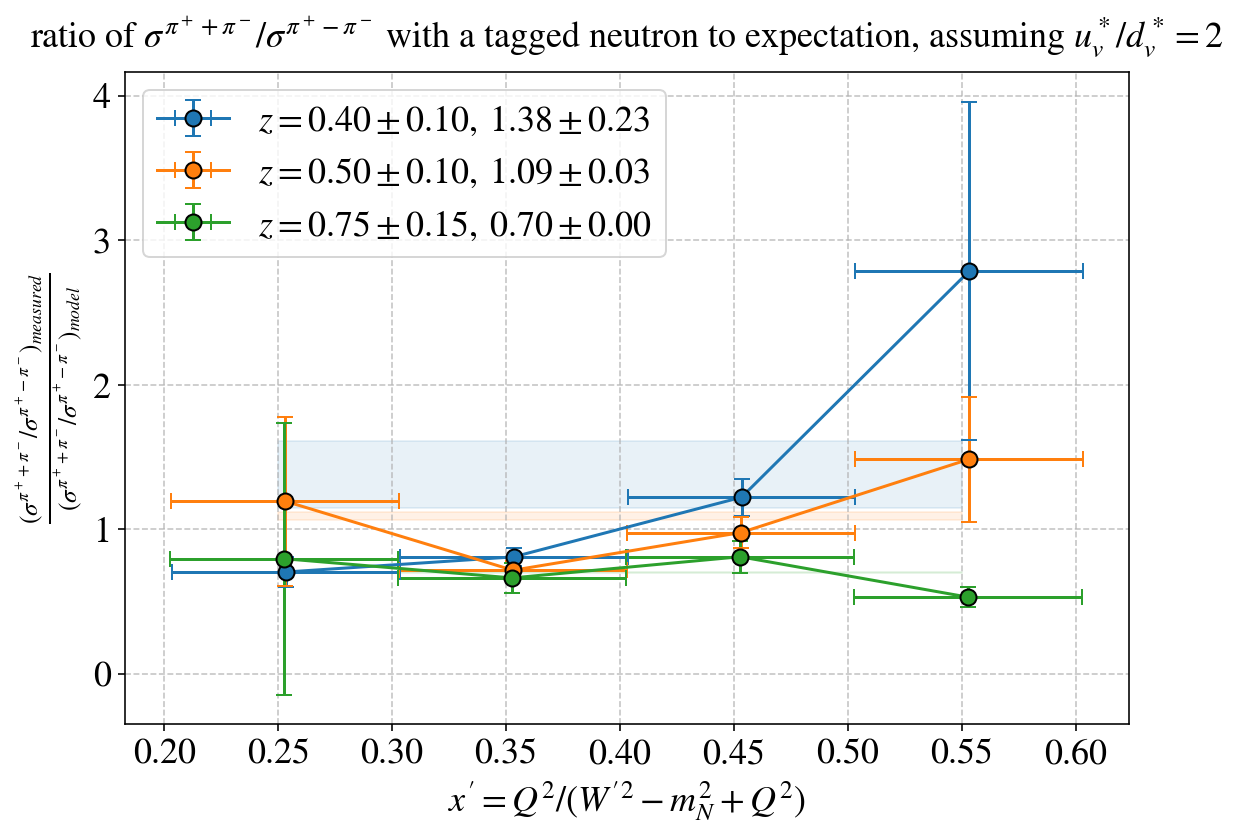

In [206]:
do_use_fit2const = True
fig = plt.figure(figsize=(9,6))
ax  = fig.add_subplot(1,1,1)
Const_R_data2exp,dConst_R_data2exp = dict(),dict()
for z_bin,z_width in zip(z_bins,z_widths):
    
    r = 0.16*z_bin*z_bin - 0.51*z_bin + 0.58    
    u_over_d = 2.
    Rassymetry_n_exp = (4. * (1+r) * u_over_d + (4*r+1))/(4.*(1-r)*u_over_d + (4*r-1))
    
    R_data2exp = Rassymetry_n[z_bin]/Rpips2pims_n_exp
    # uncertainty, not accounting for the width of the z-bin
    R_data2exp_errdw = Rassymetry_n_errdw[z_bin]/Rassymetry_n_exp
    R_data2exp_errup = Rassymetry_n_errup[z_bin]/Rassymetry_n_exp        
    
    # fit to a constant 
    p,cov = np.polyfit(x,R_data2exp,deg=0,cov=True)
    Const_R_data2exp[z_bin],dConst_R_data2exp[z_bin] = p[0],cov[0,0]
    
    # plot
    l=ax.errorbar(x=x+0.001*np.random.uniform(len(x)), xerr=x_err,  
                  y=R_data2exp, 
                  yerr=(R_data2exp_errdw,R_data2exp_errup),
                  marker='o',markeredgecolor='k',capsize=4,markersize=8,
                  label='$z=%.2f\pm%.2f, \; %.2f\pm%.2f$'%(z_bin,z_width,Const_R_data2exp[z_bin],dConst_R_data2exp[z_bin]))
    
    x_fit = np.linspace(np.min(x),np.max(x),100)
    y_dw = (Const_R_data2exp[z_bin]-dConst_R_data2exp[z_bin])*np.ones(len(x_fit))
    y_up = (Const_R_data2exp[z_bin]+dConst_R_data2exp[z_bin])*np.ones(len(x_fit))    
    ax.fill_between( x_fit, y_dw, y_up, color=l[0].get_color(), alpha=0.1)

    
set_axes(ax,xlabel_e_e_pi_n,"$\\frac{ (\sigma^{\pi^++\pi^-}/\sigma^{\pi^+-\pi^-})_{measured} }{ (\sigma^{\pi^++\pi^-}/\sigma^{\pi^+-\pi^-})_{model}}$",
         title="ratio of $\sigma^{\pi^++\pi^-}/\sigma^{\pi^+-\pi^-}$ with a tagged neutron to expectation, assuming $u_v^*/d_v^*=2$",
         do_add_grid=True, do_add_legend=True, fontsize=fontsize,);
ax.legend(fontsize=fontsize,loc='upper left')